# Fase 1 - Comprensión del negocio

1. Objetivo del negocio

  El banco Dormaammu desea desarrollar estrategias para abordar a sus nuevos clientes en función de cómo utilizan sus productos financieros y su probabilidad de caer en morosidad.

2. Situación actual

  Se ha entregado al departamento de ingeniería un conjunto de datos perteneciente al banco chileno Monopoly. Estos, en cuanto muestra, representan información transaccional y financiera de sus clientes a lo largo de 12 meses. También se ha proporcionado el detalle de las variables del conjunto de datos.

3. Objetivos de Minería de Datos

  Construir un modelo de clasificación supervisada para predecir si un cliente caerá o no en morosidad (variable binaria: 0 = no moroso, 1 = moroso).

  Construir un modelo de regresión supervisada para estimar la probabilidad de incumplimiento o el monto estimado de deuda futura.

4. Plan inicial

  Cargar y explorar los datos.

  Identificar tipos de datos.

  Evaluar calidad de datos.

  Explorar la variable target.

  Analizar correlaciones iniciales.

5. Insight esperado

  Identificar qué variables tienen mayor correlación con morosidad.

  Ver si hay desequilibrio en clases (target desbalanceado).

  Detección temprana de variables inútiles o con muchos valores nulos.



## Importación e instalación de librerías

In [2]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.9 MB 29.4 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400139 sha256=b7e6ad11e89e9fbe4f8f9498ab273ef33629d1251954953168716d7a7d8d624f
  Stored in directory: /tmp/pip-ephem-wheel-cache-xdcihcao/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8907d

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings

#Fase 2 - Comprensión de los datos

Tras la carga inicial se puede dar cuenta que la muestra entregada por el Banco Monopoly corresponde a un dataset de 51124 clientes y 574 variables. Luego de revisar el detalle de las mismas se propone el siguiente plan de acción.

Perfil demográfico (Edad)

Calcular estadísticos descriptivos: media, mediana, desviación estándar, coeficiente de variación, asimetría y curtosis. Estas métricas permiten comprender la forma y dispersión de las variables, así como detectar sesgos y concentraciones.

Obtener percentiles clave (Q1, mediana, Q3, P95) e IQR para caracterizar el rango central y los valores extremos.

Detectar posibles outliers y generar visualizaciones (histograma y boxplot), lo que facilita identificar patrones no evidentes y validar supuestos de normalidad.

Estadísticos descriptivos de variables mensuales seleccionadas

Se seleccionan dos grupos de variables con alta probabilidad de aportar información útil para predecir morosidad:

Facturación (Fac_T01–T12): refleja gasto mensual con tarjeta de crédito.

Pagos (PagoNac_T01–T12): indica el nivel de cumplimiento del cliente.

Para cada grupo seleccionado, se calcularán medidas como media, mediana, desviación estándar, mínimo y máximo a lo largo de los 12 meses, con el objetivo de sintetizar comportamientos generales sin perder la información temporal.

Se generarán visualizaciones (histograma y boxplot) para estos grupos, lo que ayuda a comprender la distribución de las variables clave, detectar posibles anomalías y preparar los datos para su posterior uso en los modelos de clasificación y regresión.

## Carga de los datos

In [4]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-04-22 02:35:58--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-04-22 02:35:59--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc681aae303a4170cac4dedb6910.dl.dropboxusercontent.com/cd/0/inline/CoSvXWsAB4Hh-O-tgu3vxDHOXhD4ugK2iw6_ZzS3yKpJaWW9U7VLiSy-9eG5SlTByAlb7PP65rkJMHDxAz871OIWZ5QVjYxL_OwfNDasjBi2meZPdQ5TitbSz0KKL6kzbjPLoDLlblRhON2kmt88MDg9/file# [following]
--2025-04-22 02:35:59--  https://uc681aae303a4170cac4dedb69

In [5]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)
data

Id  Subsegmento Sexo  Region  Edad   Renta  Antiguedad  Internauta  \
0          1          160    M    13.0    43     NaN         130           1   
1          2          160    H    13.0    46  143640          69           1   
2          3          170    H    13.0    45  929106          24           1   
3          4          151    H    13.0    46  172447         134           0   
4          5          170    H    13.0    46  805250         116           0   
...      ...          ...  ...     ...   ...     ...         ...         ...   
51119  51120          160    H    13.0    51  364978          57           1   
51120  51121          170    H    13.0    51  625376          39           1   
51121  51122          160    H    13.0    47  806220         153           1   
51122  51123          160    M    13.0    47     NaN          11           1   
51123  51124          170    H    13.0    51  840878          75           1   

       Adicional  Dualidad  ...  ColMx_T01  PagoNac_T01  PagoInt_T01  \
0              1         0  ...          0        33000            0   
1              0         0  ...          0       300000            0   
2              1         0  ...          0       216676            0   
3              1         0  ...          0        60000            0   
4              1         1  ...          0       272925            0   
...          ...       ...  ...        ...          ...          ...   
51119          1         1  ...          0       300000            0   
51120          0         0  ...          0       166098            0   
51121          1         0  ...          0        18891            0   
51122          0         0  ...          0        26528            0   
51123          1         0  ...          0        12360            0   

       EeccNac_T01  EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  \
0          1099866            0    1099866      15080          0           R   
1           214592            0     214592      83596          0           R   
2                0            0       7400          0          0           T   
3           272762            0     272762      10591          0           R   
4           249562            0      75339     377782          0           R   
...            ...          ...        ...        ...        ...         ...   
51119       478320            0     478320      12668          0           R   
51120       166098            0          0     572363          0           R   
51121         9652            0       9652      16241          0           R   
51122        24638            0      24638      84982          0           R   
51123        12360            0      18500          0          0           R   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
51119      0  
51120      0  
51121      0  
51122      0  
51123      0  

[51124 rows x 574 columns]

##Análisis Exploratorio Inicial




Tras la carga inicial se puede dar cuenta que la muestra entregada por el Banco Monopoly corresponde a un dataset de 51124 clientes y 574 variables. Luego de revisar el detalle de las mismas se propone el siguiente plan de acción.

- **Perfil demográfico (Edad)**  
  - Calcular estadísticos descriptivos: media, mediana, desviación estándar, coeficiente de variación, asimetría y curtosis. Estas métricas permiten comprender la forma y dispersión de las variables, así como detectar sesgos y concentraciones.  
  - Obtener percentiles clave (Q1, mediana, Q3, P95) e IQR para caracterizar el rango central y los valores extremos.  
  - Detectar posibles outliers y generar visualizaciones (histograma y boxplot), lo que facilita identificar patrones no evidentes y validar supuestos de normalidad.

- **Estadísticos descriptivos de variables mensuales seleccionadas**  
  - Se seleccionan dos grupos de variables con alta probabilidad de aportar información útil para predecir morosidad:
    - **Facturación (Fac_T01–T12)**: refleja gasto mensual con tarjeta de crédito.
    - **Pagos (PagoNac_T01–T12)**: indica el nivel de cumplimiento del cliente.
  - Para cada grupo seleccionado, se calcularán medidas como media, mediana, desviación estándar, mínimo y máximo a lo largo de los 12 meses, con el objetivo de sintetizar comportamientos generales sin perder la información temporal.  
  - Se generarán visualizaciones (histograma y boxplot) para dos de estos grupos, a modo representativo, lo que ayuda a comprender la distribución de las variables clave y a detectar posibles anomalías.

**Perfil demográfico**

In [6]:
# Perfil del demográfico

perfil_demografico = ProfileReport(data[['Edad']], title="Perfil del Cliente", minimal=True)

perfil_demografico.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 19.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Edad**

Los clientes del banco Monopoly tienen en promedio 38 años. Sin embargo, este valor no es completamente representativo, ya que el coeficiente de variación es del 34%, lo que indica una variabilidad considerable respecto de la media. Además, la variable Edad presenta una asimetría positiva moderada (≈ 0.998), lo que sugiere un sesgo hacia la derecha. Esto indica que la mayoría de los clientes son relativamente jóvenes, con pocos clientes de mayor edad. Esta tendencia también se puede observar visualmente en el histograma.

En cuanto a la distribución de la edad, los percentiles clave son los siguientes: el primer cuartil (Q1) es 28, la mediana es 35, y el tercer cuartil (Q3) es 46. El rango intercuartílico (IQR) es de 18, lo que sugiere que el 50% central de las edades se encuentra dentro del rango 28-46. El percentil 95 se encuentra en 65, mientras que el valor máximo de edad es 104.

La curtosis de 0.286 sugiere que la distribución es ligeramente leptocúrtica, lo que implica un pico más alto y colas más gruesas en comparación con una distribución normal. Esto refuerza la idea de que hay una mayor concentración de clientes jóvenes, aunque la distribución también tiene algunos valores más extremos, lo cual es consistente con la presencia de valores atípicos en el extremo superior.

En base a los valores de los percentiles y el IQR, podemos sugerir que los valores superiores a 65 (percentil 95) podrían considerarse como posibles outliers, especialmente aquellos cercanos al valor máximo de 104. Estos valores corresponden a clientes significativamente mayores en comparación con la mayoría de los datos. En base a esto, se procede a realizar un boxplot para visualizar la distribución y confirmar la presencia de posibles outliers, y para observar la dispersión y concentración de las edades de los clientes.

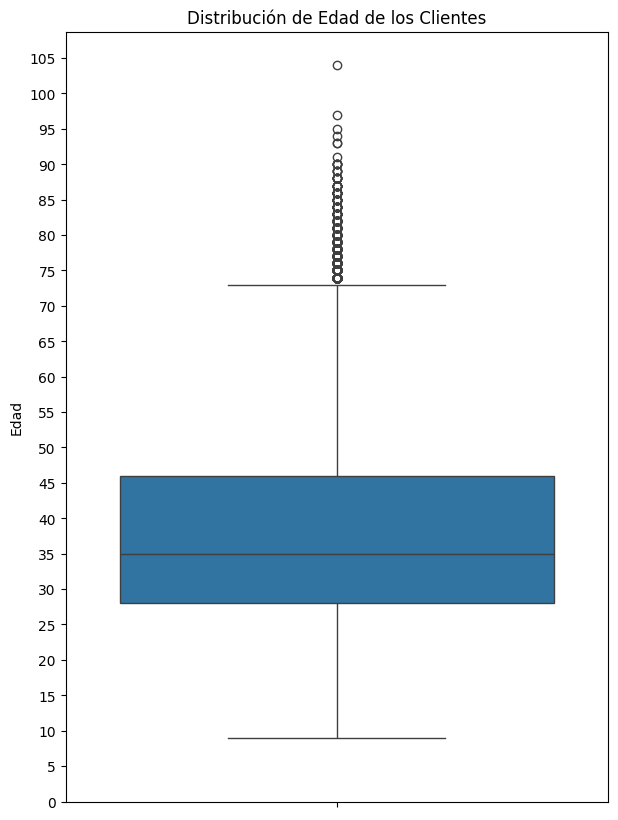

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 10))
sns.boxplot(data['Edad'] )

plt.title('Distribución de Edad de los Clientes')
plt.ylabel('Edad')
plt.yticks(range(0, 110, 5))
plt.show()


**Análisis del boxplot de la edad:**

El boxplot confirma las suposiciones iniciales sobre la distribución de la edad de los clientes del banco Monopoly. La mayoría de los datos se concentran dentro del rango intercuartílico (IQR), lo que indica que la mayoría de los clientes son relativamente jóvenes. La mediana (35) está significativamente más cerca del primer cuartil (Q1, 28) que del tercer cuartil (Q3, 46), lo que refleja una asimetría positiva en la distribución, tal como se había mencionado en el análisis previo.

Además, los valores atípicos en el extremo superior del boxplot se inician a partir de las edades cercanas a los 73-74 años, lo que confirma la presencia de clientes de mayor edad. Estos valores atípicos coinciden con los valores extremos reportados en el análisis descriptivo, que alcanzan un máximo de 104 años.


In [8]:
# Grupo Facturación
fac_cols = [col for col in data.columns if col.startswith('Fac_T')]
perfil_fac = ProfileReport(data[fac_cols], title="Comportamiento Mensual", minimal=True)

perfil_fac.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:01<00:00,  7.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Grupo Facturación**

Se detectó que las columnas Fac_T03, Fac_T06, Fac_T10, Fac_T11 y Fac_T12 contienen valores no numéricos. Se procede a cambiar el tipo de dato de estas columnas y se genera un nuevo ProfileData().

In [9]:
columnas_cambiar = ['Fac_T03', 'Fac_T06', 'Fac_T10', 'Fac_T11', 'Fac_T12']

for col in columnas_cambiar:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data[columnas_cambiar].dtypes)


Fac_T03    float64
Fac_T06    float64
Fac_T10    float64
Fac_T11    float64
Fac_T12    float64
dtype: object


In [10]:
# Grupo Facturación
fac_cols = [col for col in data.columns if col.startswith('Fac_T')]
perfil_fac = ProfileReport(data[fac_cols], title="Comportamiento Mensual", minimal=True)

perfil_fac.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 16.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Fac_T01**

La media del monto de la factura de los clientes durante enero es 70976 pesos. Sin emmbargo, dado el coeficiente de varación de 189% esta claramente está lejos de ser representativa. La mediana en el mes de enero es de 26150 pesos. Al considerar la significativa distancia entre media y mediana se puede advertir que los datos de factura durante el primer mes del año presentan alta variabilidad, lo cual es consistente con el CV de 189%. Al visualizar el histograma se hace evidente que este sugiere una curtosis elevada, lo cual se confirma con el cuoeficiente de 75.129. Asimismo, hay una asimetría positiva fuerte, con un marcado sesgo hacia la derecha dado el valor de 6.198. El histograma, junto al valor de asimetría, y la curtosis, dan cuenta de que la facturación de la tarjeta de crédito en este primer mes se concentran en bajos montos de dinero, con una minoría que factura muchísimo más de lo que lo hace la media.   

Al margen de lo anterior, notamos que existen al menos 5 valores que son menores a cero. Algunas posibles explicaciones para esto es que se trate de devoluciones de productos, ajustes o reversas internas del banco, o códigos o errores de carga mal interpretados. Para averigüar de qué se trataba decidimos encontrarlos dentro del dataset.

In [11]:
import pandas as pd

columna = 'Fac_T01'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 7 valores negativos en la columna Fac_T01.


Fac_T01
3318    -49990
11118   -13420
21249   -20000
30106   -49903
36862    -5510
38001  -119900
44241   -78500

Estos valores podrían estar influyendo en la media. Se considerará eliminarlos o reemplazarlos durante la fase 3.

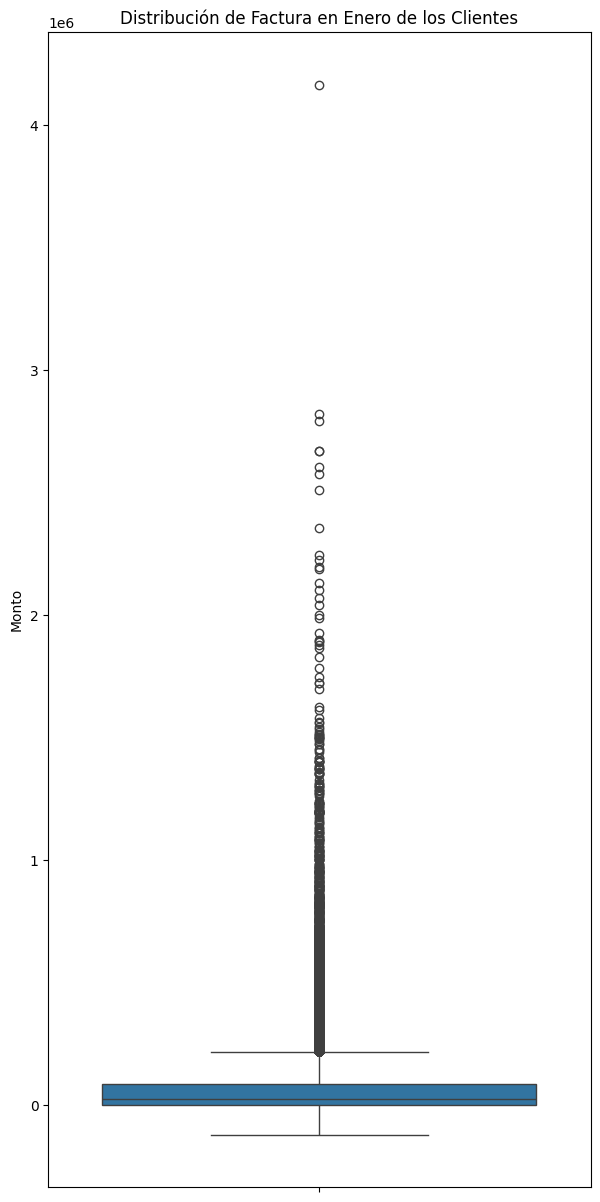

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T01'] )

plt.title('Distribución de Factura en Enero de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Tras realizar el botplox se vuelve evidente la coherencia con el histograma. A saber, que se refuerza la idea de que la mayoría de clientes factura bajas cantidades dinero, mientras  que una minoría factura considerablemente más. De hecho, el 25% de los clientes no factura (Q1) y el 75% menos de 87800 pesos (Q3). Sumado al IQR de 87800 es seguro decir que se extiende dentro de ese rango el 50% de los casos.

**Fac_T02**

La media del monto de la factura de los clientes durante febrero es 78380 pesos. Dado el coeficiente de variación de 182% (CV = 1,817), nuevamente nos encontramos ante una media no representativa. También hay un comportamiento similar al primer mes respecto de la distancia significativa entre media y mediana que es de 32026 pesos. A saber, los datos de facturación del segundo mes también presentan alta variabilidad, lo cual es consistente con el CV de 182%.

Al visualizar el histograma, se hace evidente un pico muy marcado y colas extremadamente gruesas, lo cual se confirma con la curtosis de 114,75. Asimismo, hay una asimetría positiva fuerte (sesgo hacia la derecha) dado el valor de 6,758. El histograma, junto con los coeficientes de asimetría y curtosis, dan cuenta de que la facturación de tarjeta de crédito en este segundo mes se comporta de una manera similar al anterior.

En esta misma línea, también hay valores negativos durante el mes de febrero. Además, se identificaron 12 valores nulos en esta columna.

In [13]:
import pandas as pd

columna = 'Fac_T02'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 10 valores negativos en la columna Fac_T02.


Fac_T02
10972  -23093.0
13416 -200000.0
13453 -337779.0
19743  -14507.0
21738  -41384.0
29043  -15100.0
30580  -73270.0
30962  -48932.0
38721 -136789.0
46213 -107750.0

Ahora se trata de 10 valores negativos. Algunos de ellos son bastante elevados; habrá también que eliminar o reemplazar, para así obtener un resultado más confiable en cuanto a la media.

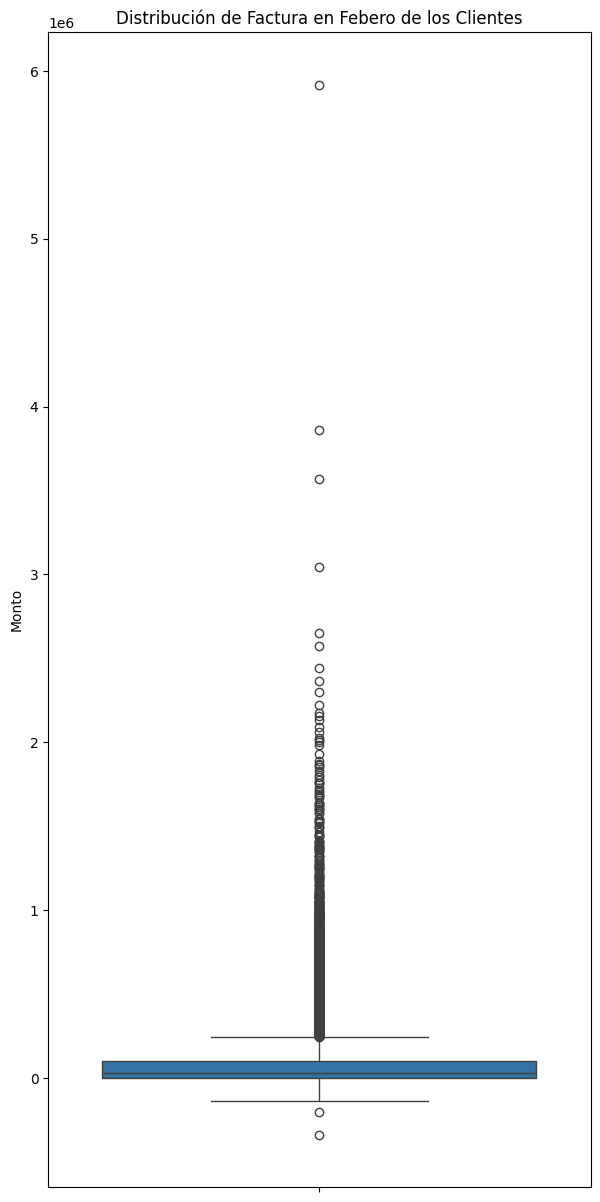

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T02'] )

plt.title('Distribución de Factura en Febero de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Tras realizar el boxplot, se vuelve a evidenciar la coherencia con el histograma. A saber:

El 25 % de los clientes no factura (Q1 = 0 pesos).

El 75 % factura menos de 98 729,75 pesos (Q3).

El rango intercuartílico (IQR = Q3–Q1) es de 98 729,75 pesos, de modo que el 50 % central de las observaciones se extiende entre 0 y 98 729,75 pesos.

Los outliers comienzan alrededor de Q3 + 1,5 × IQR ≈ 246 825 pesos y llegan hasta el valor máximo de 5 918 421 pesos.

**Fac_T03**

Durante el mes de marzo, la media de la facturación de los clientes alcanzó los 75.087 pesos. Sin embargo, dada la magnitud del coeficiente de variación (CV = 1,816), esta media se vuelve poco representativa del comportamiento general. La mediana, considerablemente menor (31.584 pesos), refuerza esta idea de alta dispersión, lo cual también se refleja en el histograma. Este patrón —de media elevada y mediana mucho más baja— se ha venido repitiendo en los meses anteriores, lo que sugiere un comportamiento estable en la distribución mensual de los montos facturados.

La asimetría positiva también es muy marcada (11,297), lo cual indica que la mayoría de los clientes factura poco, mientras que un número muy reducido factura cifras extremadamente altas, arrastrando la media hacia arriba.

En cuanto a la calidad de los datos, se identificaron 2.320 valores faltantes (4,5%) y la presencia de valores negativos (aún por cuantificar). Como en los meses anteriores, estos valores deberán ser eliminados o reemplazados para evitar sesgos y obtener una representación más fiel del comportamiento de los clientes en esta variable.

In [15]:
import pandas as pd

columna = 'Fac_T03'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 5 valores negativos en la columna Fac_T03.


Fac_T03
16514 -103979.0
40096  -92890.0
46255   -2990.0
47068  -33382.0
49946 -292344.0

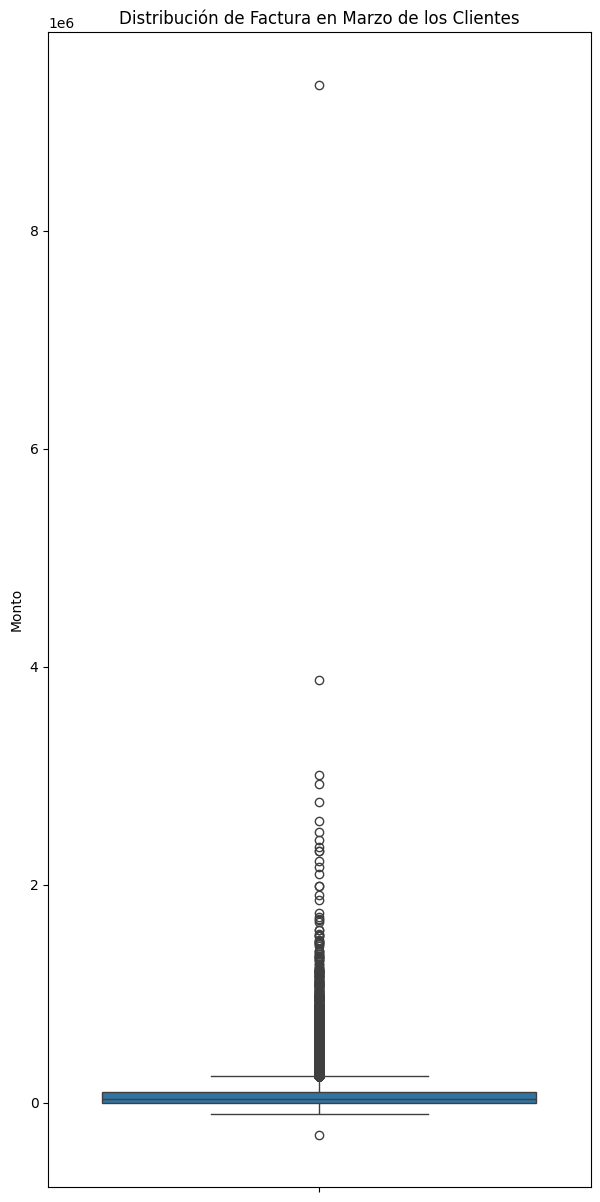

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T03'] )

plt.title('Distribución de Factura en Marzo de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Los cuantiles muestran un gran contraste entre los clientes: el 25% de ellos no registra facturación alguna (Q1 = 0), mientras que el 75% no supera los 96.585 pesos (Q3). Esto da un rango intercuartílico (IQR) de 96.585, que sigue siendo elevado. El 95% de los clientes factura menos de 290.409 pesos, mientras que el valor máximo alcanza los 9.340.500 pesos, lo cual eleva el rango total a más de 9,6 millones. Esta enorme amplitud —junto con la curtosis extrema de 492,5— da cuenta de colas muy pesadas y una alta concentración de valores extremos.

**Fac_T04**

La media del monto de la factura de los clientes durante abril es de 77 481 pesos. Al considerar el coeficiente de variación de 175% (CV = 1,750), se evidencia nuevamente que la media no es representativa del comportamiento general de los datos. Como en los meses anteriores, la distancia entre media y mediana (32 990 pesos) refleja una alta dispersión en los montos facturados. Este patrón de variabilidad elevada se mantiene de forma consistente a lo largo de los meses, consolidando la idea de que existe una importante heterogeneidad en los comportamientos de facturación mensual de los clientes.

Al observar el histograma, vuelve a manifestarse una distribución altamente sesgada hacia la derecha, con una asimetría positiva de 6,021. Este valor sugiere que una gran parte de los datos se concentra en los montos bajos, mientras que una minoría significativa extiende la distribución hacia los valores más altos. La curtosis también sigue siendo extremadamente elevada (83,43), lo que indica colas largas y una concentración de datos cercana a la mediana. Esto refuerza la noción de que los valores extremos tienen un impacto fuerte en la forma de la distribución.

En línea con los meses anteriores, también se identifican valores negativos en la columna (mínimo: –233 190 pesos), los cuales podrían deberse a devoluciones, ajustes contables o errores de carga. Asimismo, se detectaron 19 valores nulos, lo cual será considerado para su tratamiento en la fase 3 del análisis.

In [17]:
import pandas as pd

columna = 'Fac_T04'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 7 valores negativos en la columna Fac_T04.


Fac_T04
170     -4873.0
15164   -5000.0
17687 -178883.0
24209   -4800.0
24533  -90190.0
30137 -233190.0
36908  -52410.0

También se tendrán en cuenta estos valores para su reemplazo o eliminación y así descubrir en qué medida afectan a la media.

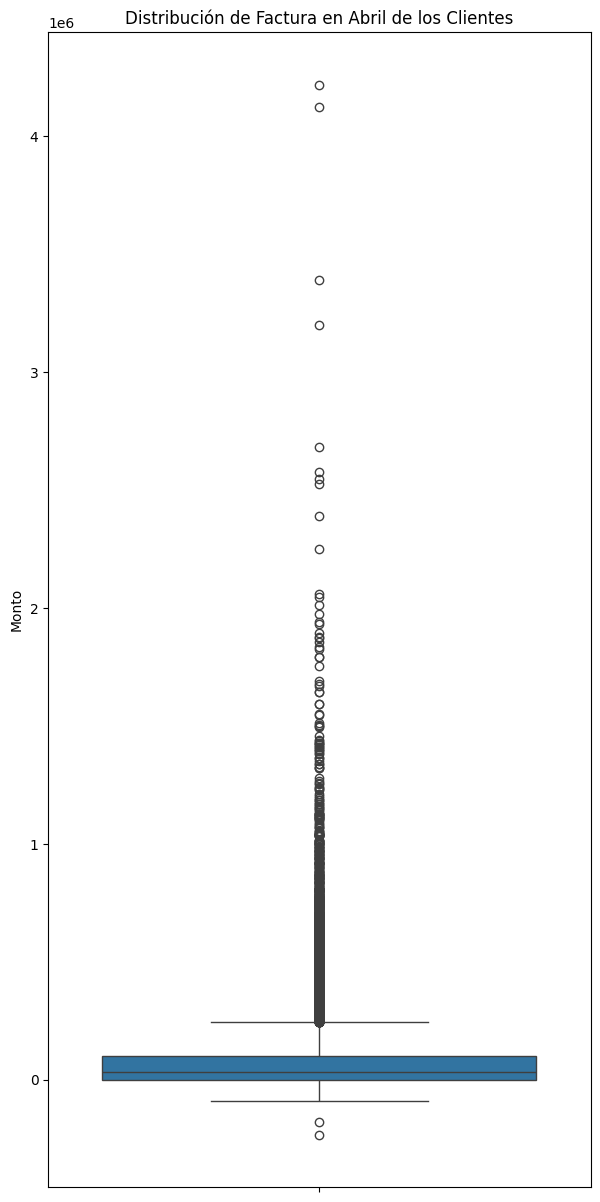

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T04'] )

plt.title('Distribución de Factura en Abril de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

El boxplot del mes de marzo confirma esta tendencia: nuevamente hay una alta concentración de datos en los valores bajos, con una gran cantidad de outliers por sobre el umbral superior (Q3 + 1,5 × IQR ≈ 245 767 pesos). La mitad central de los casos se encuentra dentro del rango 0 a 98 307 pesos, lo que refuerza la idea de que la gran mayoría de clientes factura dentro de ese rango, mientras que unos pocos casos extremos elevan artificialmente las medidas de tendencia central.




**Fac_T05**

La media del monto de la factura de los clientes durante mayo es de 67 424 pesos. Como en los meses anteriores, el coeficiente de variación elevado (CV = 1,796) indica que la media no representa adecuadamente la distribución de los datos. La diferencia entre la media y la mediana (26 000 pesos) refuerza la idea de una distribución sesgada y con alta dispersión. Esta dinámica de valores altamente variables se mantiene de forma consistente desde enero, lo cual refuerza la hipótesis de que existe un patrón estructural de concentración en montos bajos con presencia de facturaciones extremadamente altas.

El histograma correspondiente al mes de mayo muestra un comportamiento similar al observado en los meses previos: una gran cantidad de valores cercanos a cero, una cola extendida hacia la derecha, y un pico muy marcado. Esto se ve reflejado numéricamente en la asimetría positiva (5,658), que indica una fuerte inclinación de la distribución hacia la derecha, y en la curtosis elevada (64,98), que confirma la presencia de colas pesadas. El histograma, junto a estos coeficientes, muestra nuevamente que la mayoría de los clientes factura montos bajos, mientras que una minoría presenta valores muy altos, elevando tanto la media como la dispersión total.

Se detectaron valores negativos en esta variable, siendo el mínimo –890 000 pesos, lo cual podría deberse a devoluciones, correcciones contables u otro tipo de ajustes. Estos valores, al igual que en meses anteriores, serán considerados para su tratamiento en la fase 3 del análisis. Por otro lado, se encontraron 5 valores nulos.


In [19]:
import pandas as pd

columna = 'Fac_T05'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 19 valores negativos en la columna Fac_T05.


Fac_T05
1071    -8075.0
1805   -74180.0
8266   -40620.0
8370    -2040.0
10175  -22480.0
16332  -31490.0
17849  -19900.0
21961 -890000.0
22781  -30970.0
23775   -9990.0
25028   -4366.0
27231  -11990.0
27412 -181510.0
28356 -146810.0
29561  -30522.0
30225  -16090.0
46169   -2740.0
48947    -970.0
49450  -10881.0

En esta ocasión se encontraron 19 valores negativos. Claramente, antes de aventurarse a hacer conclusiones respecto de la media de los monto de las facturaciones habrá que reemplazar o eliminar estos valores.

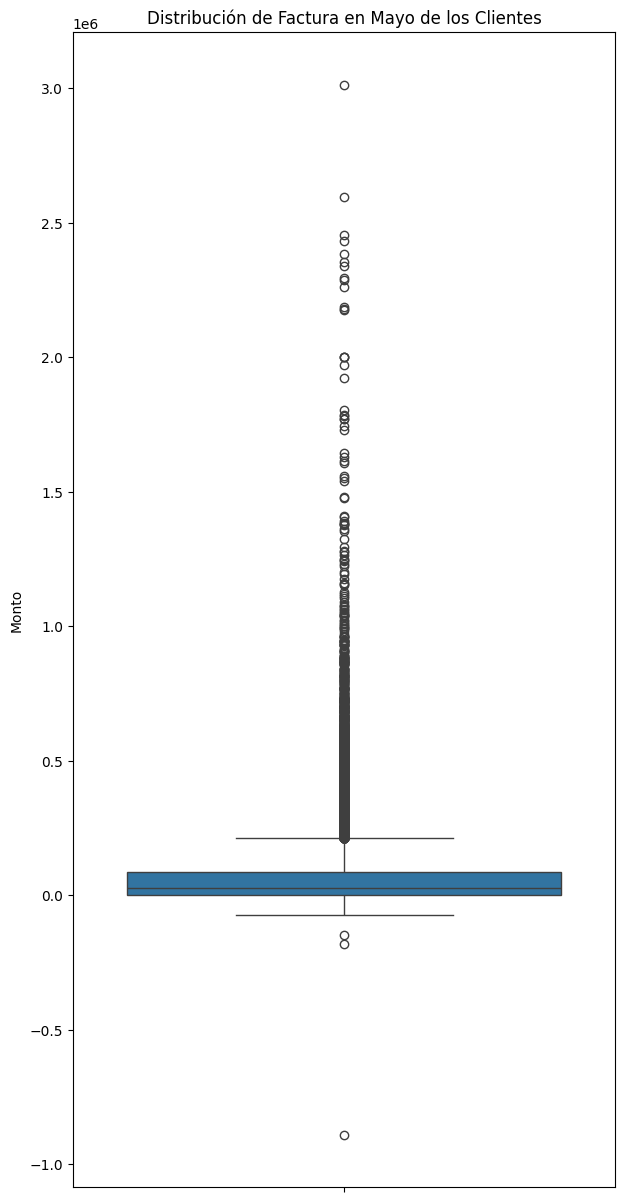

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T05'] )

plt.title('Distribución de Factura en Mayo de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

El boxplot de mayo muestra que el 25% de los clientes no factura (Q1 = 0) y el 75% lo hace por debajo de los 84 962,5 pesos (Q3). El IQR de 84 962,5 confirma que el 50% de los casos se encuentra concentrado dentro de ese rango. Sin embargo, también se observa una cantidad considerable de valores atípicos por encima del umbral superior (Q3 + 1,5 × IQR ≈ 212 406), lo que se alinea con los patrones vistos en los meses anteriores y refuerza la idea de una distribución con gran cantidad de valores extremos.

**Fac_T06**

La media de facturación de los clientes durante junio es de 68.511 pesos. No obstante, como ha sido recurrente en los meses anteriores, el coeficiente de variación es elevado (CV = 1,775), lo que indica que los datos presentan una alta dispersión respecto de la media. Este comportamiento también se refleja en la diferencia considerable entre la media y la mediana (26.828 pesos), lo cual sugiere nuevamente una distribución sesgada y no simétrica.

La asimetría positiva es nuevamente marcada (5,565), lo que indica que la mayoría de los clientes factura montos bajos, mientras que un grupo muy reducido presenta valores atípicamente altos que sesgan la media hacia arriba. Esta tendencia ya observada en los meses previos parece persistir de manera sistemática.

Respecto a la calidad de los datos, se encontraron 2.305 valores faltantes (4,5%) y también se identificaron valores negativos, lo cual será necesario abordar.

In [21]:
import pandas as pd

columna = 'Fac_T06'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 23 valores negativos en la columna Fac_T06.


Fac_T06
2382   -24350.0
3280   -42160.0
3549   -39990.0
5285     -164.0
6952  -463480.0
8056  -179473.0
10065  -59990.0
10722  -10273.0
11685  -42410.0
12400  -18725.0
15880    -567.0
20151  -44980.0
21711  -55540.0
21793 -273660.0
21930  -51990.0
25264  -31790.0
29184  -35641.0
29921 -246970.0
30090  -60692.0
31144  -28000.0
34026  -14000.0
41767  -14990.0
47950  -55790.0

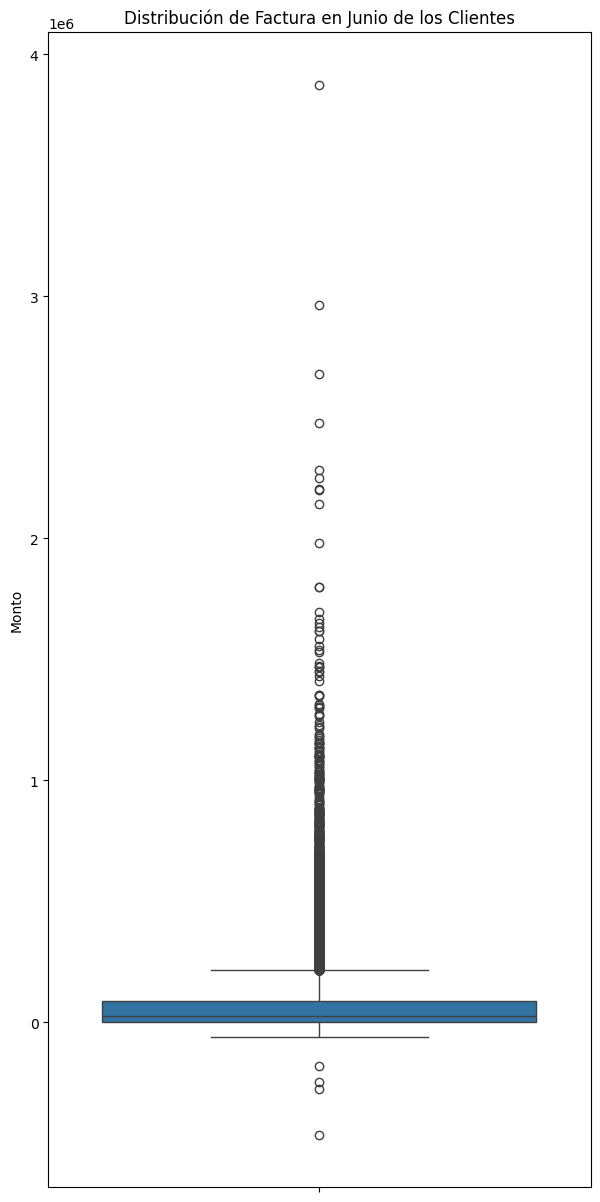

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T06'] )

plt.title('Distribución de Factura en Junio de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

El análisis de cuantiles refuerza esta idea: el primer cuartil (Q1) y el percentil 5 se mantienen en 0, lo que indica que al menos un 25% de los clientes no registró facturación. El tercer cuartil (Q3), en cambio, alcanza los 79.890 pesos, definiendo un rango intercuartílico (IQR) de 79.890. El 95% de los clientes facturó menos de 252.669 pesos, mientras que el máximo se elevó hasta 2.367.085 pesos. Estos valores extremos se ven reflejados en el rango total de 4.785.371 pesos, una diferencia muy elevada que pone en evidencia la presencia de casos atípicos.

Desde los cuantiles, se observa que al menos el 25% de los clientes no presenta facturación (Q1 = 0), y que el 75% no supera los 86.724 pesos (Q3), lo cual define un rango intercuartílico de 86.724.5 pesos. El 95% de los clientes factura menos de 273.356 pesos, mientras que el valor máximo alcanza los 3.874.900, lo que resulta en un rango total superior a 4,3 millones. Esta brecha amplísima es coherente con la curtosis de 69,08, que sugiere colas pesadas en la distribución.

**Fac_T07**

La media del monto de la factura de los clientes durante julio es de 77.451 pesos. Dado el coeficiente de variación de 164% (CV = 1,643), nuevamente nos encontramos ante una media no representativa. Este patrón ya había emergido en los meses anteriores, y se refuerza ahora al notar que la mediana del mes es de 35.800 pesos, bastante inferior a la media. Esto indica una alta variabilidad en los datos de facturación, lo cual se alinea con el CV observado.

Al revisar el histograma del mes, se mantiene la presencia de un pico muy pronunciado en los valores bajos y colas largas hacia la derecha, características que reflejan una fuerte asimetría positiva. Esta asimetría se cuantifica en un valor de 5,019, mientras que la curtosis elevada (52,41) vuelve a confirmar una distribución leptocúrtica. En resumen, la gran mayoría de los clientes factura montos bajos, y unos pocos extremos elevan considerablemente las métricas como la media.

Cabe destacar que en esta oportunidad se encontraron 833 valores nulos.


In [23]:
import pandas as pd

columna = 'Fac_T07'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 8 valores negativos en la columna Fac_T07.


Fac_T07
4371  -156224.0
5149   -30000.0
5211   -21990.0
9309   -21214.0
16367   -3290.0
28938  -18970.0
36795 -188990.0
39483 -196366.0

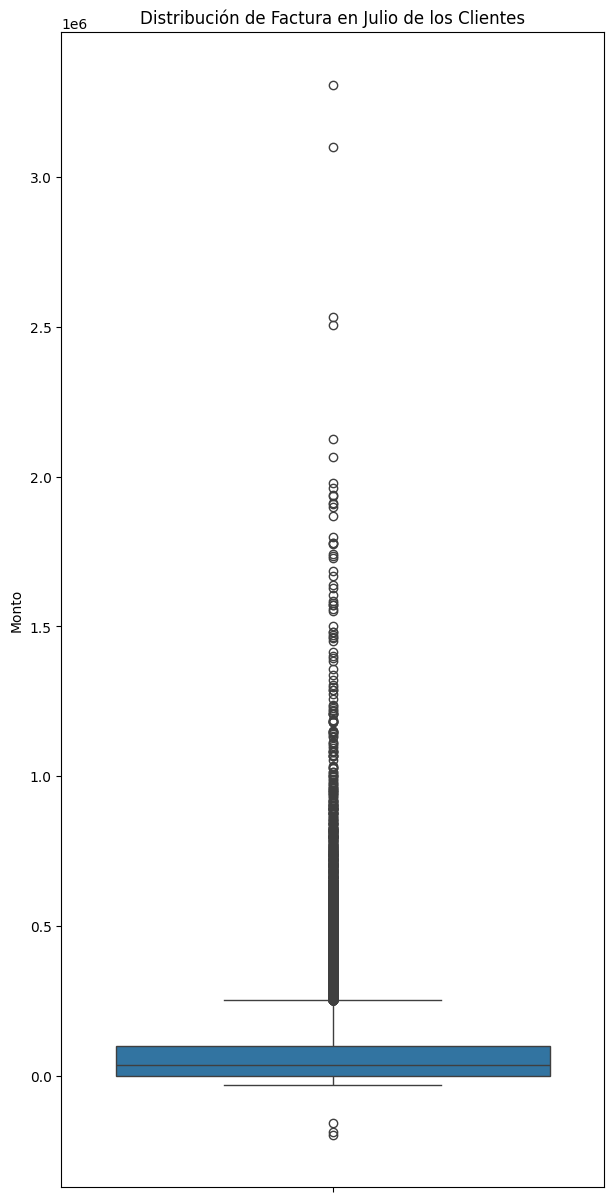

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T07'] )

plt.title('Distribución de Factura en Julio de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Desde el punto de vista de los cuantiles, el 25% de los clientes no factura (Q1 = 0), y el 75% factura menos de 100.805 pesos (Q3). Esto significa que el 50% de los casos se concentra en ese rango, definido por un IQR de 100.805 pesos. Por otra parte, el 95% de los clientes factura menos de 294.012 pesos, mientras que el valor máximo alcanza los 3.308.662 pesos. Esto, junto con un rango total de más de 3,5 millones, da cuenta del grado de dispersión en los datos.

**Fac_T08**

La media del monto de la factura de los clientes durante agosto es de 67.828 pesos. Al considerar el coeficiente de variación de 181% (CV = 1,815), una vez más nos encontramos con una media poco representativa. Este patrón, que ya viene observándose en los meses anteriores, se confirma aquí nuevamente al notar que la mediana es de solo 26.800 pesos. La gran distancia entre ambas refuerza la idea de alta variabilidad, coherente con la desviación estándar de 123.103 pesos.

El histograma del mes presenta nuevamente una distribución con un pico muy concentrado en los montos bajos y colas muy alargadas hacia la derecha. Esta fuerte asimetría positiva se cuantifica en un valor de 5,715, mientras que la curtosis alcanza los 66,76, evidenciando una vez más una distribución leptocúrtica. La facturación de agosto también está dominada por una mayoría que factura muy poco, contrastando con una minoría que factura montos extraordinarios.

En esta ocasión se detectaron 2.200 valores nulos, equivalentes al 4,3% del total.

In [25]:
import pandas as pd

columna = 'Fac_T08'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 21 valores negativos en la columna Fac_T08.


Fac_T08
915   -194587.0
957      -900.0
3106    -5570.0
4897     -209.0
5117   -10450.0
6256  -116036.0
10200  -22090.0
12698   -3070.0
15269  -41890.0
15549 -166984.0
16240  -14340.0
18906  -11176.0
20094  -71903.0
25851  -24277.0
32419  -39524.0
36974  -38455.0
37026   -5635.0
37993 -382370.0
38105 -162510.0
46721  -14143.0
49605 -132120.0

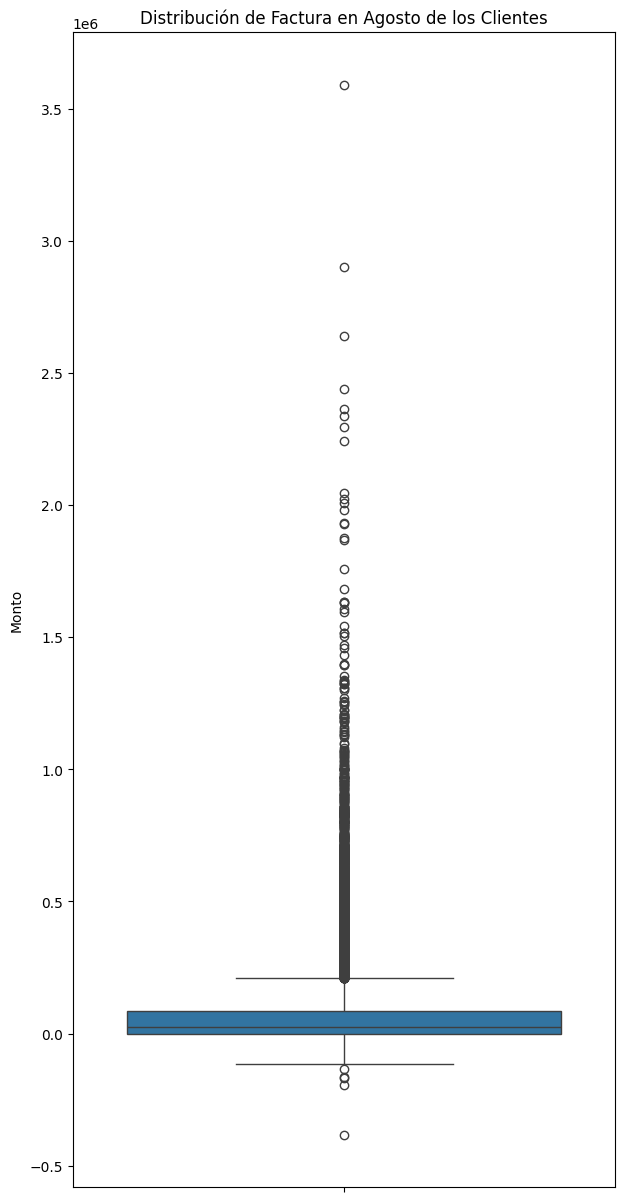

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T08'] )

plt.title('Distribución de Factura en Agosto de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Desde el análisis de los cuantiles, observamos que el 25% de los clientes no factura (Q1 = 0), y el 75% factura menos de 84.656 pesos (Q3), lo cual define un rango intercuartílico (IQR) de 84.656 pesos, dentro del cual se concentra el 50% de los casos. A su vez, el 95% de los clientes factura menos de 266.449 pesos, aunque el valor máximo es de 3.591.507 pesos, resultando en un rango total de casi 4 millones.

**Fac_T09**

La media del monto de la factura de los clientes durante septiembre es de 69.951 pesos. Como es habitual, el coeficiente de variación de 181% (CV = 1,807) indica que la media no es representativa debido a la alta dispersión de los datos. La mediana en este mes es de 28.325 pesos, lo que resalta la notable diferencia entre ambas medidas de tendencia central, indicando nuevamente que los datos presentan alta variabilidad, coherente con la desviación estándar de 126.416 pesos.

El histograma muestra una distribución con un pico central correspondiente a montos bajos de facturación, con una fuerte asimetría positiva, evidenciada por el valor de 6,077 en el coeficiente de asimetría. Además, la curtosis alcanza los 83,07, lo que señala que la distribución tiene colas muy gruesas, indicativas de una mayor concentración de datos en valores bajos y una minoría con montos de facturación extremadamente altos.

Se detectaron 3.800 valores nulos, lo que equivale al 7,4% de los datos totales. Además, se identificaron valores negativos en la distribución, lo que requiere su eliminación o reemplazo para evitar sesgar las medidas de tendencia central.

In [27]:
import pandas as pd

columna = 'Fac_T09'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 5 valores negativos en la columna Fac_T09.


Fac_T09
2816   -18394.0
9564   -72000.0
21524  -41890.0
24365 -152000.0
29650  -17090.0

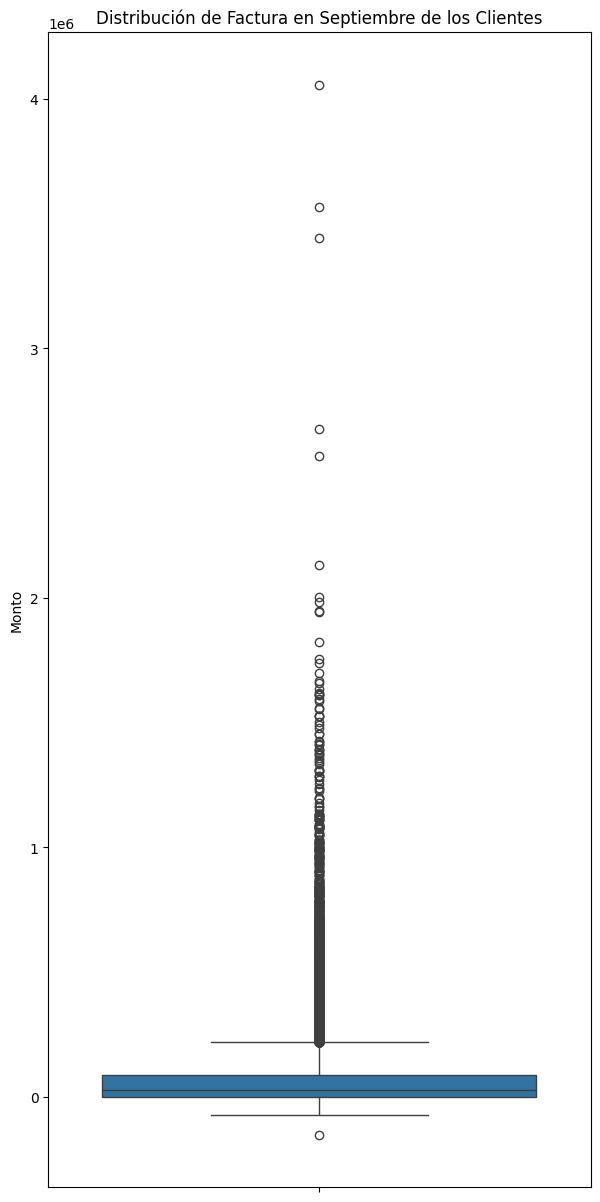

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T09'] )

plt.title('Distribución de Factura en Septiembre de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

A partir de los cuantiles, observamos que el 25% de los clientes no factura (Q1 = 0) y el 75% factura menos de 87.430 pesos (Q3), lo que genera un rango intercuartílico (IQR) de 87.430 pesos, abarcando el 50% de los casos. El 95% de los clientes factura menos de 276.363 pesos, pero el valor máximo llega a 4.057.749 pesos, lo que resulta en un rango total de más de 4 millones.

**Fac_T10**

Durante el mes de octubre, la media de facturación fue de 60.578 pesos. Sin embargo, el coeficiente de variación (CV = 1,838) revela una alta dispersión de los datos en torno a esta media, lo que la vuelve poco representativa. Esta idea se refuerza al observar la diferencia entre la media y la mediana, que es de 21.627 pesos, lo cual sugiere una distribución marcadamente asimétrica.

Tanto la curtosis (54,14) como la asimetría positiva (5,159) indican una distribución con colas pesadas hacia la derecha, donde un pequeño grupo de clientes presenta montos desproporcionadamente altos que distorsionan el comportamiento general.

En términos de calidad de datos, esta columna presenta 6.983 valores faltantes, lo que representa un 13,7% del total, además de registros negativos.

In [29]:
import pandas as pd

columna = 'Fac_T10'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 3 valores negativos en la columna Fac_T10.


Fac_T10
6629   -24900.0
33377  -23259.0
45546 -169061.0

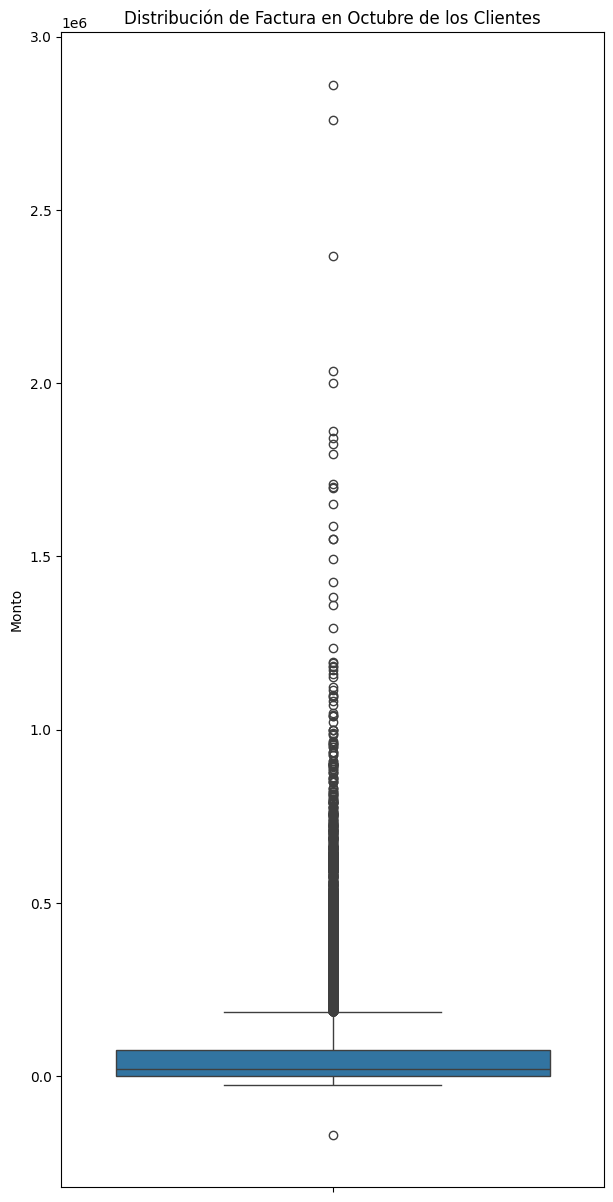

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T10'] )

plt.title('Distribución de Factura en Octubre de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

El análisis de cuantiles aporta más evidencia sobre esta distribución desigual. Un 25% de los clientes no registró facturación (Q1 = 0), mientras que el 75% facturó menos de 74.550 pesos (Q3), estableciendo un rango intercuartílico (IQR) de 74.550. A su vez, el 95% de los registros no superó los 248.245 pesos, pero el valor máximo alcanzó los 2.861.687 pesos. Esto genera un rango de más de tres millones de pesos, reflejo de la enorme dispersión en los valores.

**Fac_T11**

Para el mes de noviembre, el promedio de facturación se ubicó en 63.405 pesos, pero este valor resulta poco representativo al considerar el alto coeficiente de variación (CV = 1,803), que señala una importante dispersión en los datos. La mediana (24.900 pesos) es considerablemente menor que la media, lo que sugiere una distribución asimétrica influida por valores extremos.

La distribución de los datos también presenta una fuerte asimetría positiva (4,895), con una curtosis alta (55,36) que señala colas largas y valores extremos en el lado derecho. Este tipo de distribución suele ser problemática para análisis que asumen normalidad.

Además, la columna contiene 8.247 valores faltantes, lo que representa un 16,1% del total, un nivel de ausentismo que debe ser abordado antes de aplicar modelos o análisis más complejos

In [31]:
import pandas as pd

columna = 'Fac_T11'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 6 valores negativos en la columna Fac_T11.


Fac_T11
9305  -2418286.0
19837  -109700.0
25018  -140890.0
26123   -49990.0
28969  -107970.0
36957  -178450.0

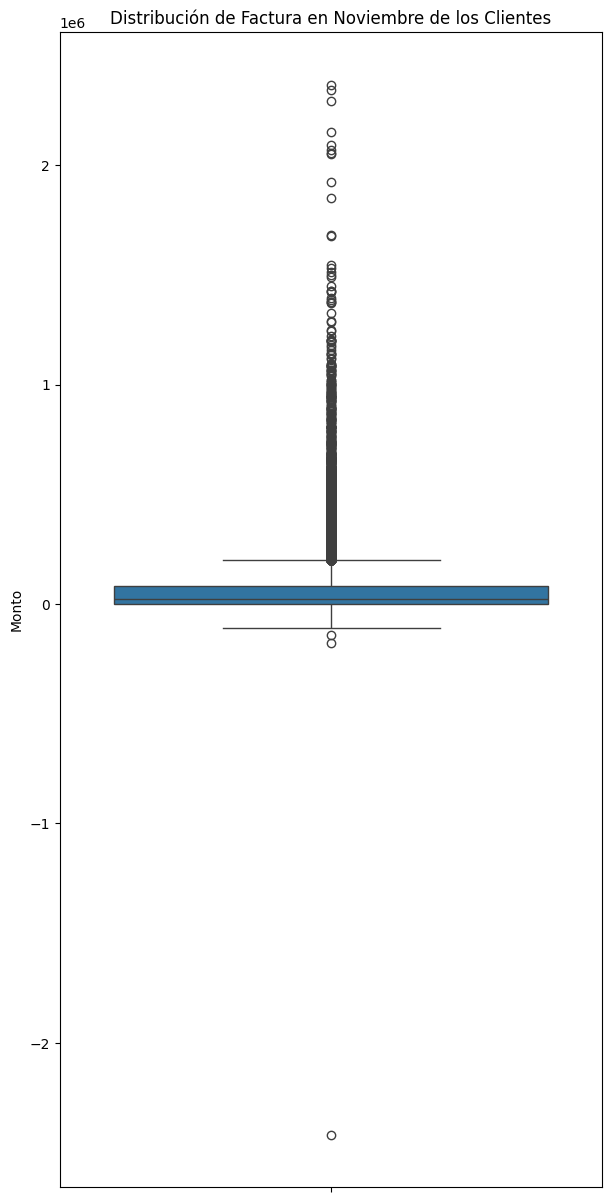

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T11'] )

plt.title('Distribución de Factura en Noviembre de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

El análisis de cuantiles refuerza esta idea: el primer cuartil (Q1) y el percentil 5 se mantienen en 0, lo que indica que al menos un 25% de los clientes no registró facturación. El tercer cuartil (Q3), en cambio, alcanza los 79.890 pesos, definiendo un rango intercuartílico (IQR) de 79.890. El 95% de los clientes facturó menos de 252.669 pesos, mientras que el máximo se elevó hasta 2.367.085 pesos. Estos valores extremos se ven reflejados en el rango total de 4.785.371 pesos, una diferencia muy elevada que pone en evidencia la presencia de casos atípicos.

**Fac_T12**

En el mes de diciembre, la media de facturación fue de 62.660 pesos, sin embargo, esta cifra nuevamente se ve fuertemente influenciada por la presencia de valores extremos. El coeficiente de variación (CV) alcanza un valor elevado de 1,814, lo que indica una dispersión considerable con respecto al promedio. La mediana es apenas de 22.600 pesos, lo que confirma que la mayoría de las observaciones están por debajo del promedio, reflejando una distribución sesgada.

En términos de forma de la distribución, los datos presentan una alta asimetría positiva (5,64) y una curtosis de 67,93, lo que indica colas muy largas a la derecha, típicas de distribuciones donde unos pocos valores dominan el comportamiento general.

Finalmente, esta columna contiene 9.716 valores faltantes, lo que representa un preocupante 19% del total de observaciones.

In [33]:
import pandas as pd

columna = 'Fac_T12'

# Filtrar filas donde el valor sea negativo
negativos = data[data[columna] < 0]

# Mostrar los resultados
print(f"Se encontraron {len(negativos)} valores negativos en la columna {columna}.")
negativos[[columna]]

Se encontraron 5 valores negativos en la columna Fac_T12.


Fac_T12
1579   -39593.0
19589  -33251.0
21253  -39990.0
40294  -36280.0
45434 -480000.0

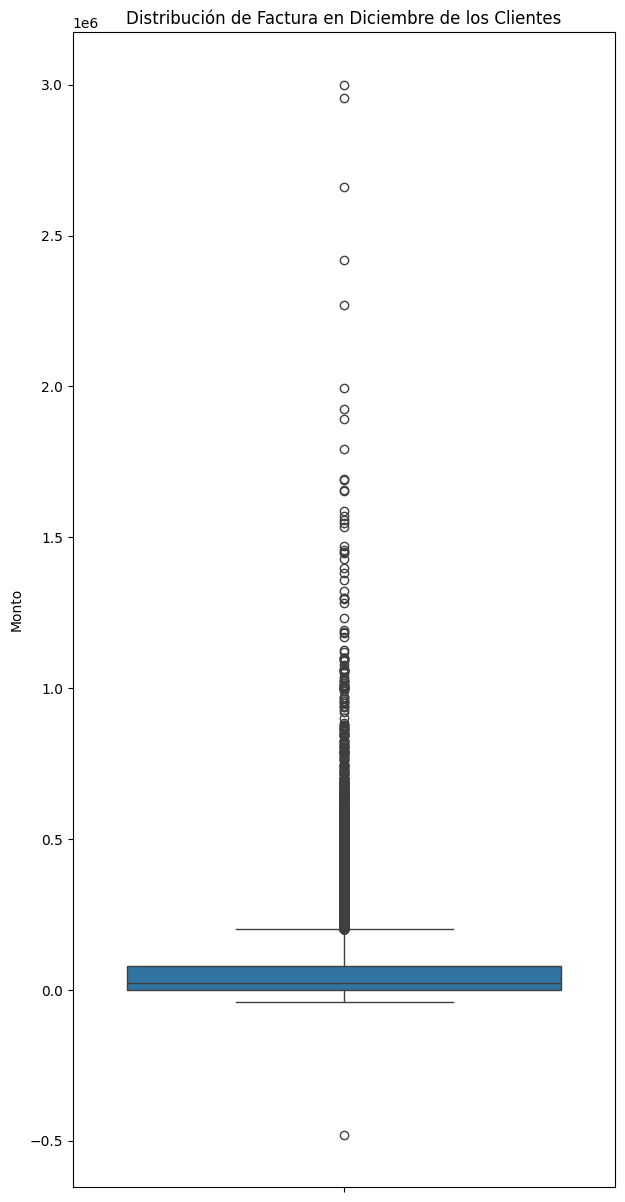

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['Fac_T12'] )

plt.title('Distribución de Factura en Diciembre de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

El análisis de cuantiles refuerza esta idea: el primer cuartil (Q1) y el percentil 5 se mantienen en 0, lo que indica que al menos un 25% de los clientes no registró facturación. El tercer cuartil (Q3), en cambio, alcanza los 79.890 pesos, definiendo un rango intercuartílico (IQR) de 79.890. El 95% de los clientes facturó menos de 252.669 pesos, mientras que el máximo se elevó hasta 2.367.085 pesos. Estos valores extremos se ven reflejados en el rango total de 4.785.371 pesos, una diferencia muy elevada que pone en evidencia la presencia de casos atípicos.

A pesar de que las variables de facturación mensual contienen valores nulos y en algunos casos valores negativos, se ha considerado pertinente realizar una correlación preliminar entre estas variables y la variable target. Esto se justifica como parte de una exploración inicial que busca observar cómo se comportan los montos de facturación desde enero hasta diciembre con respecto a la probabilidad de pago total del cliente (variable objetivo binaria).

Es importante tener en cuenta que, si bien los valores nulos no son ignorados automáticamente por todos los métodos estadísticos, la correlación de Pearson utilizada aquí sí permite realizar el cálculo omitiendo aquellos pares de datos donde existan valores ausentes. Esto permite obtener una idea general, aunque no definitiva, sobre la fuerza y dirección de la relación lineal entre cada mes de facturación y el target.

Este análisis sirve como una aproximación diagnóstica y será refinado en la Fase 3 del proceso CRISP-DM, donde se llevará a cabo una limpieza más rigurosa de los datos, con estrategias de imputación y tratamiento de outliers, para obtener resultados más precisos y robustos.

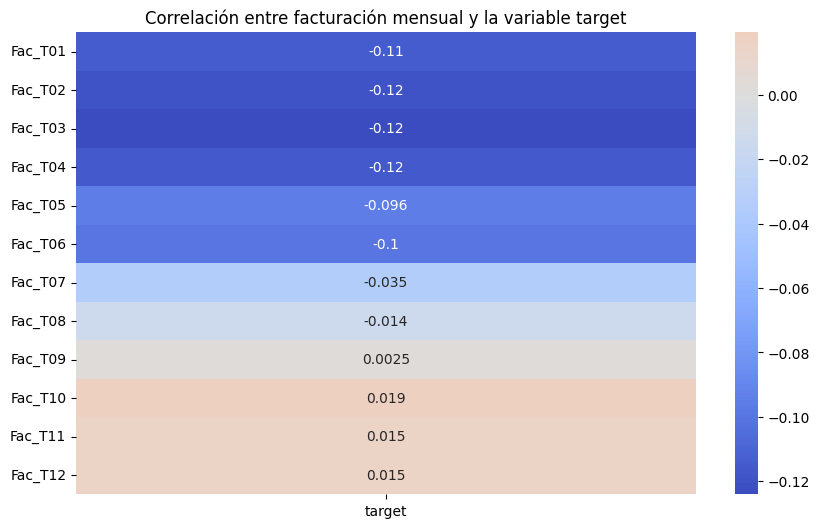

           target
Fac_T01 -0.114264
Fac_T02 -0.119014
Fac_T03 -0.123989
Fac_T04 -0.115053
Fac_T05 -0.095903
Fac_T06 -0.100102
Fac_T07 -0.034673
Fac_T08 -0.013724
Fac_T09  0.002465
Fac_T10  0.019328
Fac_T11  0.014741
Fac_T12  0.014679


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

facturacion_cols = [f'Fac_T{str(i).zfill(2)}' for i in range(1, 13)]
facturacion_target = data[facturacion_cols + ['target']]

correlaciones = facturacion_target.corr()

correlacion_target = correlaciones[['target']].drop('target')

plt.figure(figsize=(10, 6))
sns.heatmap(correlacion_target, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre facturación mensual y la variable target')
plt.show()

print(correlacion_target)


En este análisis preliminar de las variables de facturación de enero a diciembre (Fac_T01 - Fac_T12), hemos observado una correlación débil con la variable target (oscilando entre -0.12 y 0.02). Sin embargo, es importante destacar que existen valores nulos y negativos en las variables de facturación, lo que podría estar afectando estos resultados. Estos valores erróneos deben ser tratados en fases posteriores. Por lo tanto, se recomienda realizar un proceso de limpieza de datos, incluyendo la eliminación de valores nulos y la corrección de valores negativos antes de realizar un nuevo análisis de correlación. Este análisis es solo una evaluación preliminar, y los resultados deben ser tomados con cautela. Se planea volver a evaluar las correlaciones en la fase 3, después de la limpieza de datos, para obtener una visión más clara y precisa de cómo las variables de facturación se relacionan con target.

In [36]:
# Grupo Pagos
fac_cols = [col for col in data.columns if col.startswith('PagoNac')]
perfil_pagos = ProfileReport(data[fac_cols], title="Comportamiento Mensual", minimal=True)

perfil_pagos.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 21.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Grupo Pagos**

**PagoNac_T01**

En el mes de enero, la media de los pagos realizados por los clientes fue de 76 375 pesos, aunque esta cifra se ve fuertemente influenciada por la presencia de valores extremos. El coeficiente de variación (CV) alcanza un valor elevado de 1,95, lo que indica una gran dispersión con respecto al promedio. La mediana es apenas de 34 001,5 pesos, lo que confirma que la mayoría de los clientes registraron pagos bajos, reflejando una distribución sesgada hacia valores menores.

En términos de forma de la distribución, los datos presentan una alta asimetría positiva (11,43) y una curtosis de 354,02, lo que indica la presencia de colas extremadamente largas a la derecha, típicas de distribuciones donde unos pocos valores dominan el comportamiento general. Esto sugiere que, mientras muchos clientes tienen pagos pequeños o nulos, un pequeño grupo realiza pagos muy elevados, distorsionando las métricas agregadas como la media.

Finalmente, esta columna no presenta valores faltantes ni negativos, a diferencia de las facturas. La ausencia de negativos aquí sugiere que aquellos valores negativos en las facturas correspondían a devoluciones, notas de crédito o ajustes internos, y no a un error de captura generalizado.

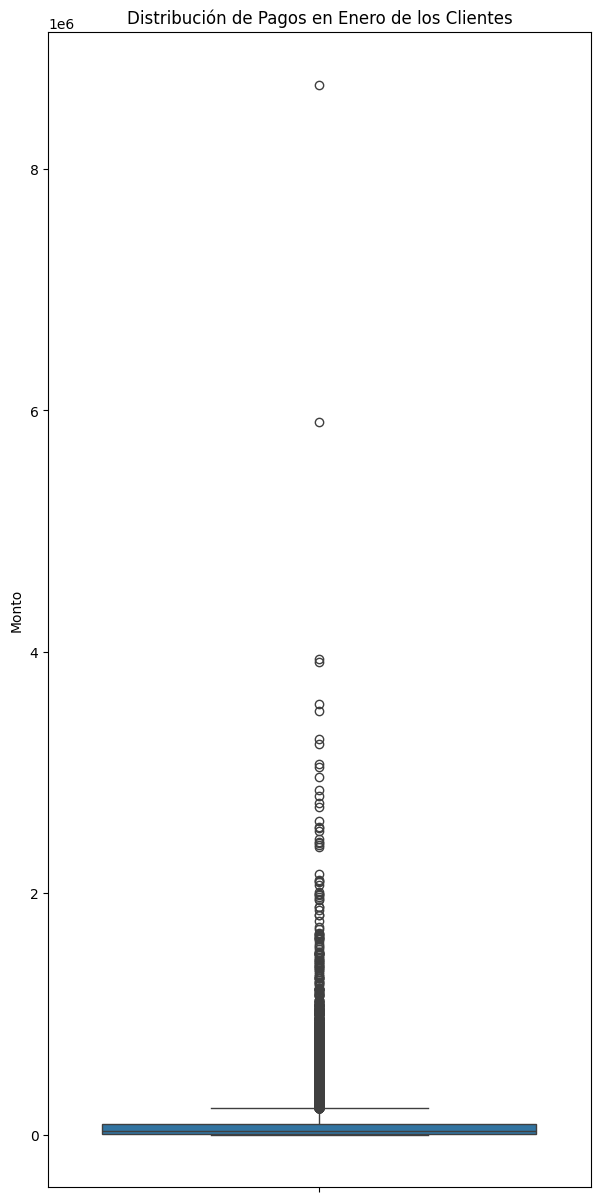

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T01'] )

plt.title('Distribución de Pagos en Enero de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

El análisis de cuantiles refuerza esta observación: el primer cuartil (Q1) y el percentil 5 se mantienen en 0, indicando que al menos un 25 % de los clientes no realizó ningún pago. El tercer cuartil (Q3) alcanza los 92 000 pesos, delimitando el rango donde se concentra el 50 % central de los datos. El percentil 95 es de 284 832,35 pesos, mientras que el valor máximo llega a 8 697 782 pesos, resultando en un rango total de 8 697 782 pesos. Estos valores extremos ponen de manifiesto la existencia de pagos atípicos que deben considerarse con cuidado en el modelado de morosidad.

**PagoNacT_02**

En el mes de febrero, los pagos nacionales realizados por los clientes muestran nuevamente una fuerte concentración hacia los valores bajos, influenciada por la presencia de montos extremadamente altos. La media de los pagos es de 79.064 pesos, sin embargo, la mediana se ubica apenas en 37.000 pesos, lo que evidencia una distribución claramente asimétrica, donde la mayoría de los clientes paga montos inferiores al promedio.

El coeficiente de variación (CV) es de 1,81, lo que indica una elevada dispersión de los datos en relación con la media. En cuanto a la forma de la distribución, se observa una alta asimetría positiva (7,49), junto con una curtosis de 111,72, confirmando la existencia de colas largas hacia la derecha y valores atípicos significativos.

A diferencia del comportamiento observado en las variables de facturación, en esta columna no se presentan valores negativos, lo que refuerza la idea de que en el caso de las facturas estábamos probablemente ante un fenómeno de reversas, anulaciones u operaciones de crédito mal clasificadas como gasto, mientras que en los pagos el registro parece reflejar montos efectivamente desembolsados.

Solo 12 observaciones presentan valores nulos, lo que representa menos del 0,1% de los registros.

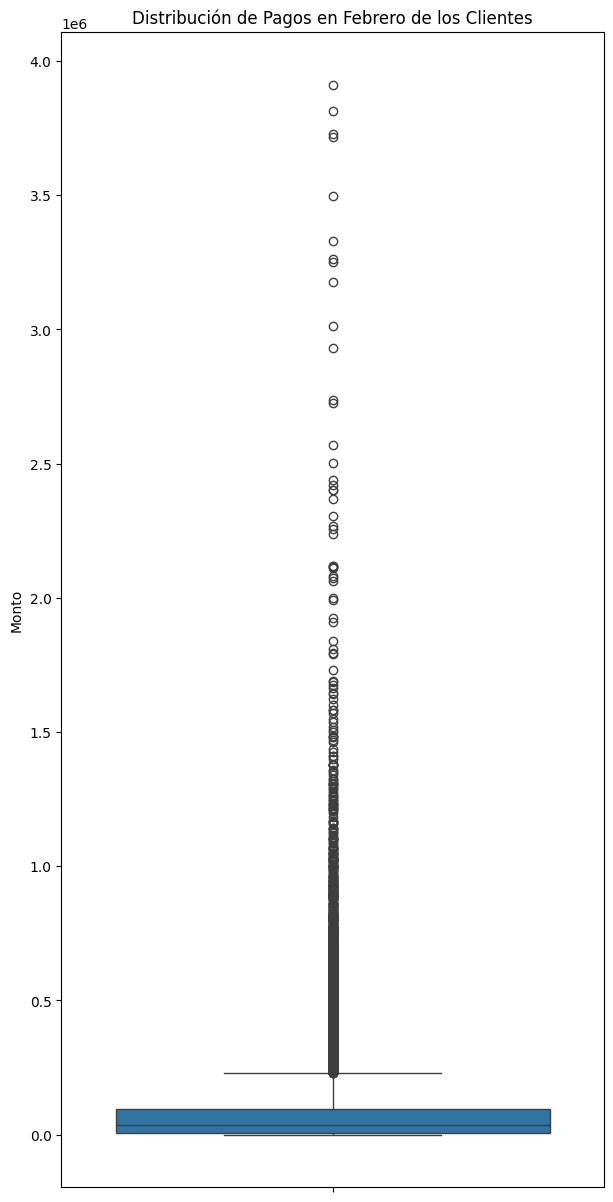

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T02'] )

plt.title('Distribución de Pagos en Febrero de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

El análisis de cuantiles refuerza esta idea de concentración: el 25% de los clientes no pagó más de 7.000 pesos, y el 50% no superó los 37.000 pesos. El tercer cuartil se ubica en 96.763 pesos, mientras que el 95% de los pagos se mantiene bajo los 298.591 pesos. Aun así, el máximo registrado alcanzó los 3.912.000 pesos, lo que define un rango total de igual magnitud y confirma la presencia de valores extremos que sesgan la distribución hacia la derecha.

**PagoNacT_03**

Durante el mes de marzo, los pagos nacionales presentan un patrón aún más extremo en comparación con los meses anteriores. La media alcanza los 69.558 pesos, sin embargo, la mediana se sitúa considerablemente más abajo, en apenas 30.000 pesos, lo que indica que más de la mitad de los clientes realizó pagos muy por debajo del promedio.

El coeficiente de variación (CV) asciende a 2,13, confirmando una dispersión muy elevada. Esta variabilidad se ve impulsada por la presencia de valores atípicos muy marcados: la asimetría positiva alcanza un valor de 17,53 y la curtosis se dispara a 760,63, evidenciando una distribución extremadamente sesgada con colas largas hacia la derecha. Esta situación es más extrema incluso que la observada en febrero, lo que sugiere que unos pocos clientes realizaron pagos inusualmente altos, afectando de forma significativa las medidas de tendencia central.

A pesar de este comportamiento extremo, solo se detectan 10 valores nulos, lo que representa menos del 0,1% del total, y nuevamente no se observan pagos negativos, lo que reafirma que esta variable refleja efectivamente montos abonados, a diferencia del caso de las facturas.

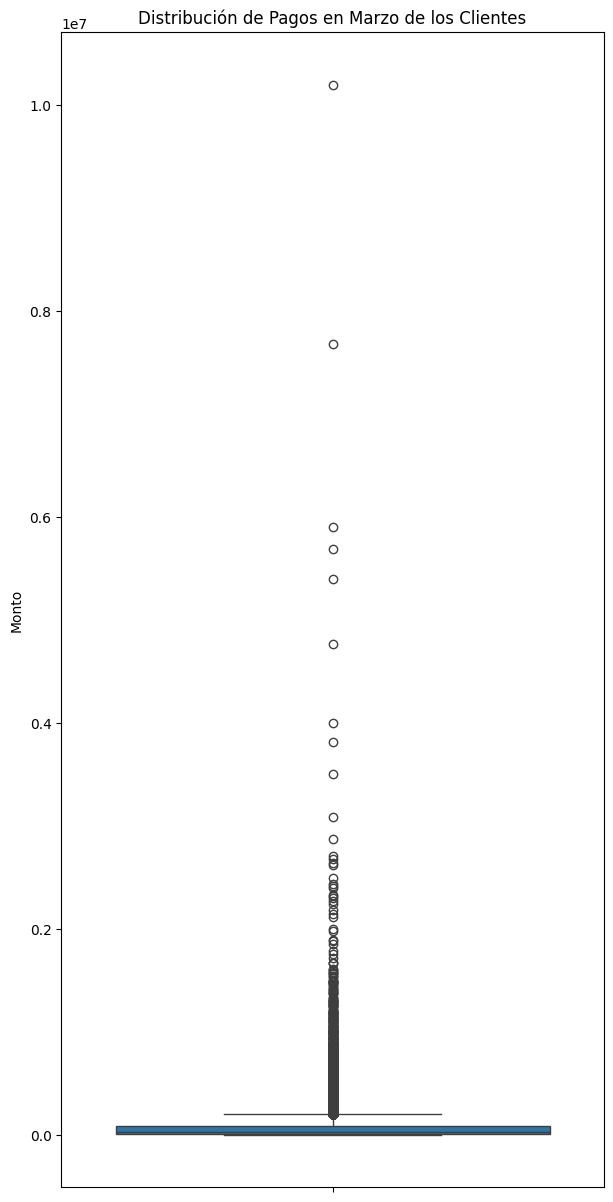

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T03'] )

plt.title('Distribución de Pagos en Marzo de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

En cuanto a los cuantiles, el primer cuartil se encuentra en 4.990 pesos, mientras que la mediana apenas alcanza los 30.000. El 75% de los pagos no supera los 82.366 pesos, mientras que el 95% permanece por debajo de 257.916. Sin embargo, el valor máximo registrado es de 10.200.000 pesos, un monto significativamente superior al del mes anterior, que eleva el rango total a esa misma cifra. Este dato extremo representa un caso atípico que impacta fuertemente en el promedio general.

**PagoNacT_T04**

En el mes de abril, los pagos nacionales muestran una tendencia similar a la observada en marzo, con un patrón de alta dispersión. La media se sitúa en 76.551 pesos, un valor considerablemente más alto que el mes anterior, aunque, como en meses previos, la mediana se encuentra mucho más abajo, en 35.000 pesos, lo que indica que la mitad de los clientes realizó pagos por debajo de este umbral.

El coeficiente de variación (CV) es de 1,96, lo que señala una dispersión elevada en los datos. Este valor es ligeramente menor al del mes anterior (2,13), pero sigue mostrando una considerable variabilidad en los pagos. La asimetría positiva alcanza un valor de 11,72, lo que confirma una distribución sesgada hacia la derecha, con una gran cantidad de clientes realizando pagos bajos, pero con algunos casos excepcionales de pagos elevados.

La curtosis se eleva a 300,20, lo que sugiere que la distribución tiene colas largas y que los valores atípicos siguen teniendo un impacto importante. Aunque la distribución es más moderada en comparación con marzo, todavía se presentan pagos muy altos que distorsionan las medidas de tendencia central, como la media.

Con respecto a los valores nulos, se observa una cantidad mínima, con solo 19 registros faltantes, representando menos del 0,1% del total, lo que indica una buena calidad en los datos.

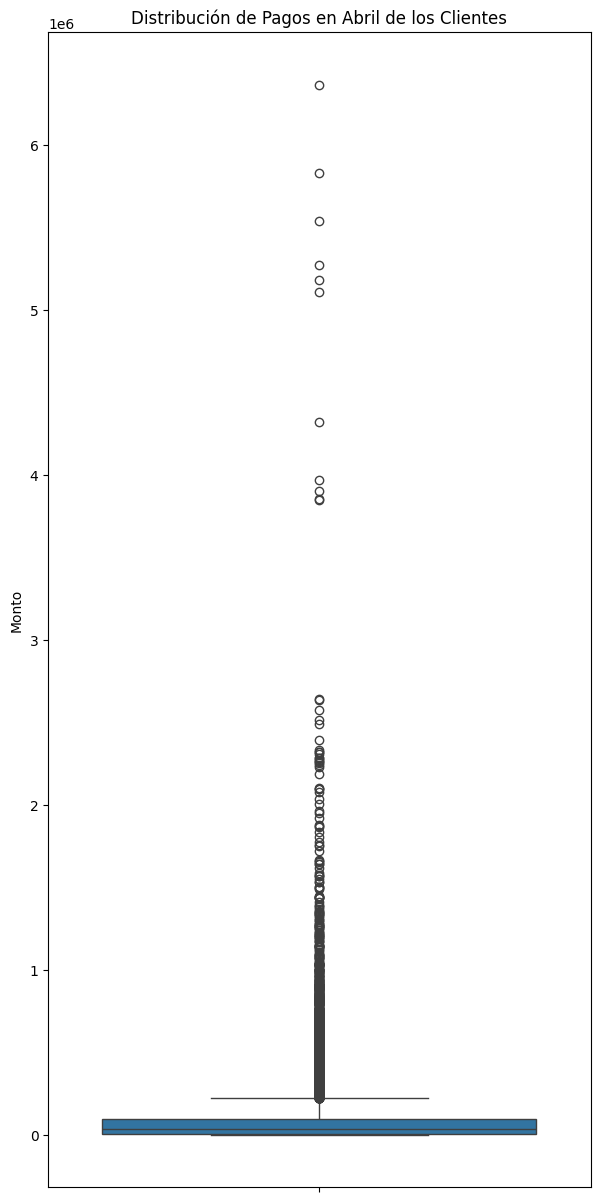

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T04'] )

plt.title('Distribución de Pagos en Abril de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

En cuanto a los cuantiles, el primer cuartil se encuentra en 6.000 pesos, la mediana en 35.000 pesos, y el tercer cuartil alcanza los 93.159 pesos. El 95% de los pagos no supera los 279.719 pesos, mientras que el valor máximo registrado es de 6.363.388 pesos, un pago excepcionalmente alto que contribuye a la expansión del rango total, el cual es de 6.363.388 pesos. Este caso atípico es consistente con los patrones observados en los meses anteriores, donde unos pocos pagos extremos influyen significativamente en las estadísticas generales.

**PagoNacT_T05**

En el mes de mayo, los pagos nacionales siguen mostrando un patrón similar al de los meses anteriores, caracterizado por una alta dispersión. La media se sitúa en 66.827 pesos, lo que es inferior a la del mes anterior, aunque la mediana se mantiene relativamente baja, en 28.000 pesos. Este comportamiento indica que la mayoría de los clientes realizaron pagos por debajo de la media.

El coeficiente de variación (CV) es de 1,99, lo que indica que la dispersión sigue siendo bastante elevada, aunque ligeramente menor que en abril. La asimetría positiva alcanza un valor de 9,36, lo que confirma una distribución sesgada hacia la derecha, con una gran concentración de pagos bajos, pero también con algunos valores extremos que afectan las estadísticas generales.

La curtosis es de 180,46, lo que sugiere que la distribución tiene colas relativamente largas, similares a las observadas en meses anteriores, debido a los pagos atípicos que siguen siendo comunes en este conjunto de datos. Aunque la distribución es algo menos extrema que en marzo y abril, sigue mostrando una significativa variabilidad debido a estos valores fuera de lo común.

En cuanto a los valores faltantes, se detectan 25 registros nulos, lo que representa menos del 0,1% del total, manteniendo la calidad de los datos relativamente alta.

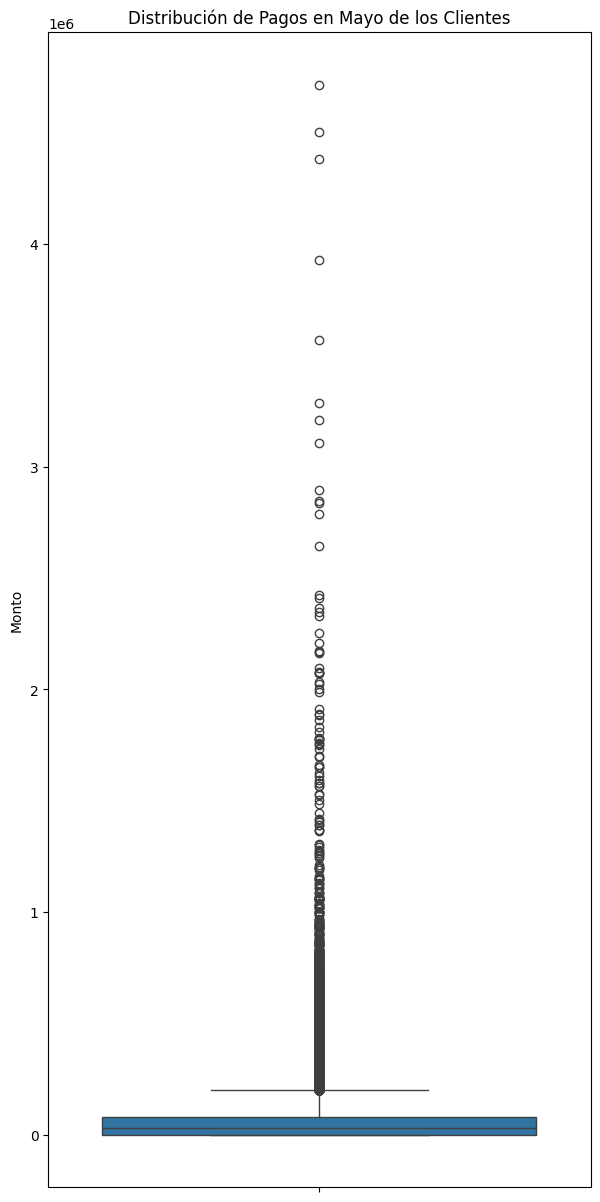

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T05'] )

plt.title('Distribución de Pagos en Mayo de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Los cuantiles muestran que el primer cuartil (Q1) se encuentra en 0 pesos, lo que indica que una parte significativa de los clientes no realizó pagos. La mediana es de 28.000 pesos y el tercer cuartil (Q3) se ubica en 80.000 pesos. El 95% de los pagos no superan los 253.495 pesos, mientras que el valor máximo registrado es de 4.716.979 pesos, lo que representa un pago excepcionalmente alto, similar a lo observado en meses anteriores. Este caso atípico eleva significativamente el rango total, que es de 4.716.979 pesos.

**PagoNacT_T06**

En el mes de junio, los pagos nacionales continúan mostrando un patrón similar al de los meses previos, con una considerable dispersión en los datos. La media se sitúa en 72.954 pesos, lo que es ligeramente superior a la del mes anterior. Sin embargo, la mediana se mantiene relativamente baja en 30.000 pesos, lo que indica que más de la mitad de los clientes realizaron pagos por debajo de este valor.

El coeficiente de variación (CV) es de 1,99, lo que refleja una alta dispersión, similar a la observada en meses anteriores. La asimetría positiva es de 9,77, lo que señala una distribución sesgada hacia la derecha, con una mayoría de clientes realizando pagos bajos, pero con algunos pocos clientes realizando pagos extremadamente altos, lo que impacta las estadísticas generales.

La curtosis es de 222,19, lo que indica una distribución con colas largas, caracterizada por la presencia de valores atípicos. Aunque la distribución es menos extrema que en marzo, sigue mostrando una alta concentración de pagos bajos y algunos pagos fuera de lo común que afectan las medidas de tendencia central.

En cuanto a los valores faltantes, se registran 43 valores nulos, lo que representa aproximadamente el 0,1% del total, un porcentaje bajo pero que sigue siendo relevante en el análisis de calidad de los datos.

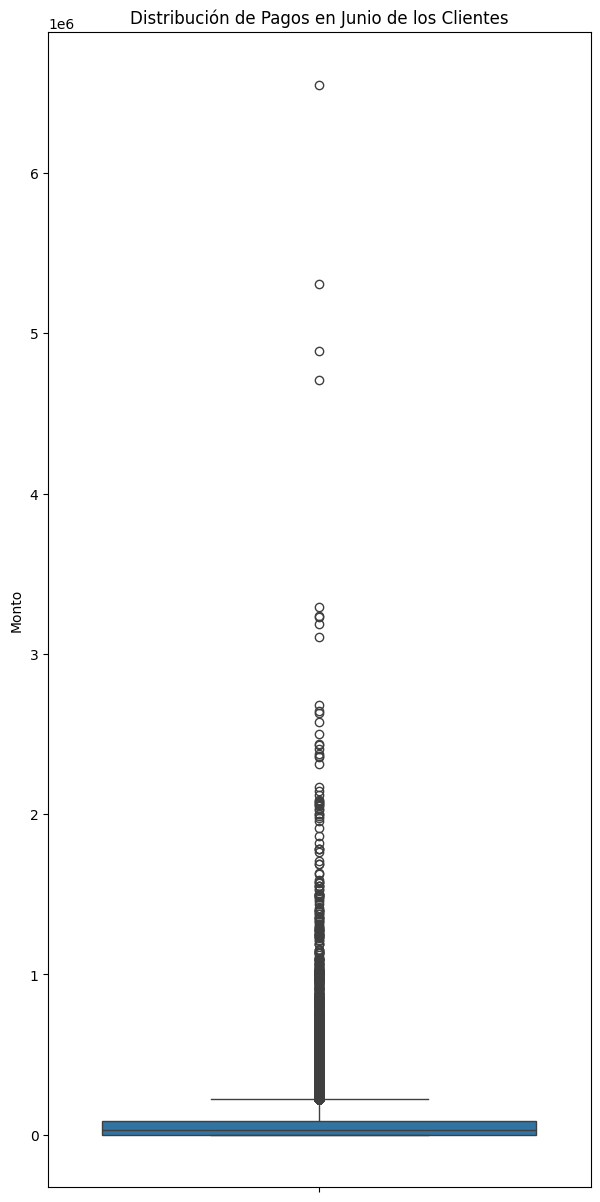

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T06'] )

plt.title('Distribución de Pagos en Junio de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Los cuantiles muestran que el primer cuartil (Q1) se encuentra en 1 peso, lo que indica que algunos clientes no realizaron pagos o realizaron pagos muy bajos. La mediana es de 30.000 pesos y el tercer cuartil (Q3) está en 87.784 pesos. El 95% de los pagos no superan los 280.000 pesos, mientras que el valor máximo registrado es de 6.551.506 pesos, un pago excepcionalmente alto que distorsiona las estadísticas y eleva significativamente el rango total, que alcanza los 6.551.506 pesos.

**PagoNacT_T07**

En el mes de julio, los pagos nacionales muestran un patrón similar al de meses anteriores, pero con una mayor dispersión y la presencia de algunos valores atípicos aún más extremos. La media se sitúa en 67.084 pesos, lo que es ligeramente inferior a la del mes anterior, pero sigue siendo significativamente más alta que la mediana, que se encuentra en 25.948 pesos. Esto indica que más de la mitad de los clientes realizó pagos por debajo de este valor, mientras que los pagos más altos influyen considerablemente en la media.

El coeficiente de variación (CV) es de 2,19, lo que refleja una mayor dispersión en comparación con los meses previos, lo que subraya una mayor variabilidad en los pagos. La asimetría positiva alcanza un valor de 15,19, lo que evidencia una distribución muy sesgada hacia la derecha, con muchos clientes realizando pagos bajos, pero con algunos pocos clientes realizando pagos extremadamente altos que alteran las estadísticas generales.

La curtosis es de 563,02, lo que indica que la distribución tiene colas largas y una concentración de valores extremos mucho más pronunciada que en los meses anteriores. Esta alta curtosis confirma la presencia de pagos atípicos que siguen influyendo de manera significativa en la distribución de los pagos.

En cuanto a los valores faltantes, se registran 833 valores nulos, lo que representa un 1,6% del total, un porcentaje considerablemente más alto que en meses anteriores. Este aumento en los valores faltantes podría indicar que se requiere una revisión adicional en la calidad de los datos.

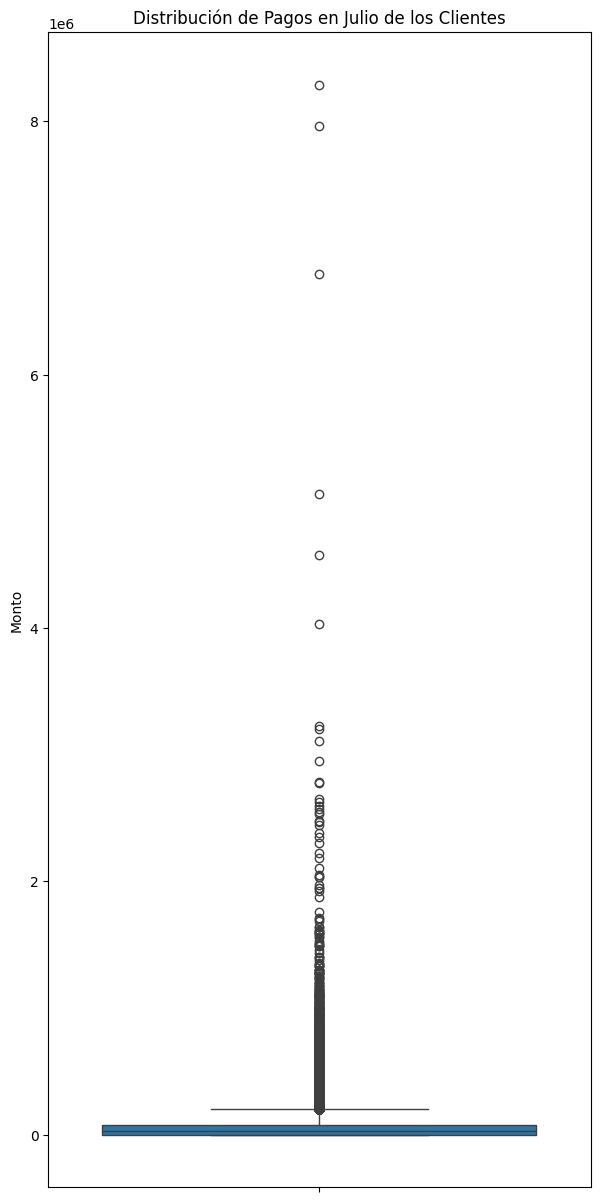

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T07'] )

plt.title('Distribución de Pagos en Julio de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Los cuantiles muestran que el primer cuartil (Q1) se encuentra en 0 pesos, lo que indica que algunos clientes no realizaron pagos. La mediana es de 25.948 pesos, y el tercer cuartil (Q3) está en 79.970,5 pesos. El 95% de los pagos no superan los 260.000 pesos, mientras que el valor máximo registrado es de 8.288.780 pesos, un pago excepcionalmente alto que eleva el rango total a 8.288.780 pesos. Este valor atípico tiene un impacto significativo en el promedio y refleja un patrón de pagos extremadamente variables.

**PagoNacT_T08**

En el mes de agosto, los pagos nacionales continúan exhibiendo una alta dispersión, con algunos valores atípicos extremadamente altos que siguen influyendo en las estadísticas generales. La media se sitúa en 66.667 pesos, ligeramente por debajo de la del mes anterior. Sin embargo, la mediana se mantiene más baja, en 26.000 pesos, lo que indica que la mayoría de los clientes realizó pagos por debajo de la media, con pocos pagos altos que afectan significativamente la tendencia central.

El coeficiente de variación (CV) es de 2,23, lo que indica una dispersión aún mayor en comparación con los meses previos, lo que refleja una alta variabilidad entre los pagos realizados. La asimetría positiva alcanza un valor de 14,14, lo que confirma una distribución fuertemente sesgada hacia la derecha, donde predominan los pagos bajos, pero con una presencia considerable de pagos extremadamente altos que distorsionan el comportamiento general de la variable.

La curtosis es de 461,10, lo que señala una distribución con colas largas, indicando una gran concentración de pagos atípicos, similares a los observados en meses anteriores. Este valor de curtosis confirma que la distribución es altamente sesgada debido a los pocos pagos extremos que alteran las medidas de tendencia central.

En cuanto a los valores faltantes, se registran 2.200 valores nulos, lo que representa un 4,3% del total, un porcentaje bastante elevado en comparación con los meses anteriores. Este incremento en los valores faltantes podría sugerir un problema en la recopilación de datos o en la consistencia de los registros.

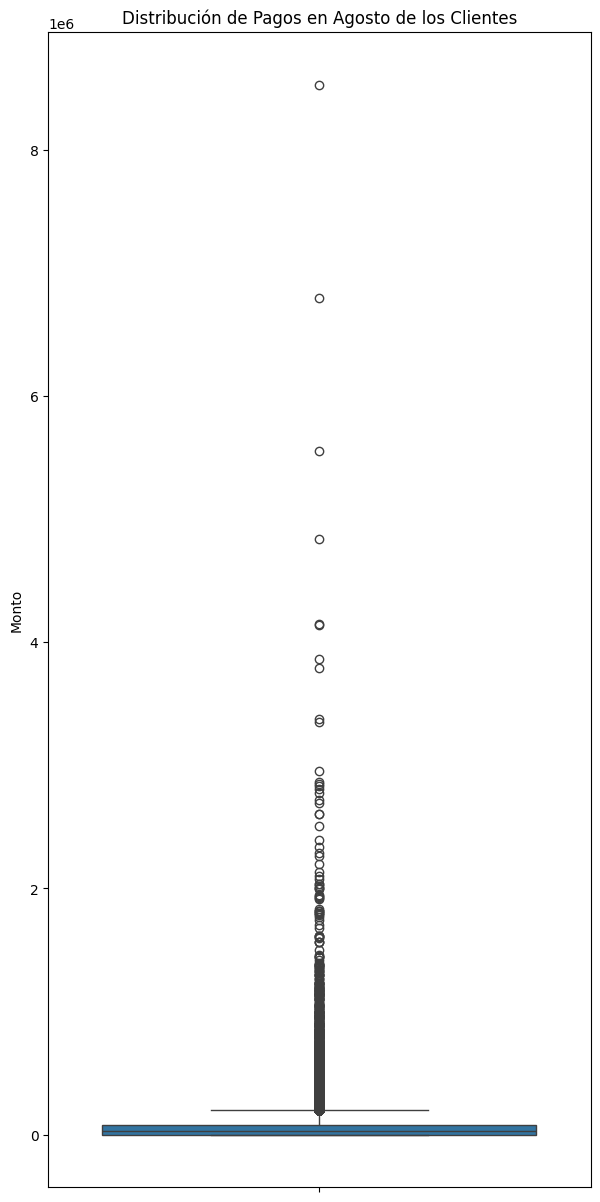

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T08'] )

plt.title('Distribución de Pagos en Agosto de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Los cuantiles muestran que el primer cuartil (Q1) se encuentra en 0 pesos, lo que indica que una parte significativa de los clientes no realizó pagos, o bien, realizaron pagos muy bajos. La mediana es de 26.000 pesos, y el tercer cuartil (Q3) se encuentra en 79.000 pesos. El 95% de los pagos no superan los 250.000 pesos, mientras que el valor máximo registrado es de 8.530.346 pesos, un pago extremadamente alto que eleva el rango total a 8.530.346 pesos. Este valor atípico tiene un impacto notable en el promedio y refleja la fuerte dispersión en los pagos.

**PagoNacT_T09**

En el mes de septiembre, los pagos nacionales continúan mostrando una alta dispersión y la presencia de valores atípicos extremadamente elevados. La media se sitúa en 68.357 pesos, lo que es un poco superior a la del mes anterior, pero aún alejada de la mediana, que se encuentra en 26.986 pesos. Esto sugiere que más de la mitad de los clientes realizó pagos significativamente más bajos que el promedio, con unos pocos pagos extremadamente altos que afectan las estadísticas generales.

El coeficiente de variación (CV) es de 2,32, lo que indica una dispersión aún mayor que en los meses anteriores. Esta alta variabilidad refleja una gran diferencia entre los pagos realizados por los clientes. La asimetría positiva es de 18,07, lo que subraya un sesgo hacia la derecha en la distribución, con una fuerte concentración de pagos bajos, pero también una importante cantidad de pagos atípicos que alteran significativamente el comportamiento de la variable.

La curtosis es de 801,62, lo que indica una distribución con colas muy largas y una concentración de pagos extremos mucho más pronunciada que en meses anteriores. Este valor de curtosis refleja la alta concentración de valores atípicos que continúan influyendo en las medidas de tendencia central y dispersión.

En cuanto a los valores faltantes, se detectan 3.800 valores nulos, lo que representa un 7,4% del total, un porcentaje considerablemente más alto que en meses anteriores. Este aumento en los valores faltantes sugiere que se debe prestar atención a la calidad y la consistencia de los datos en este mes.

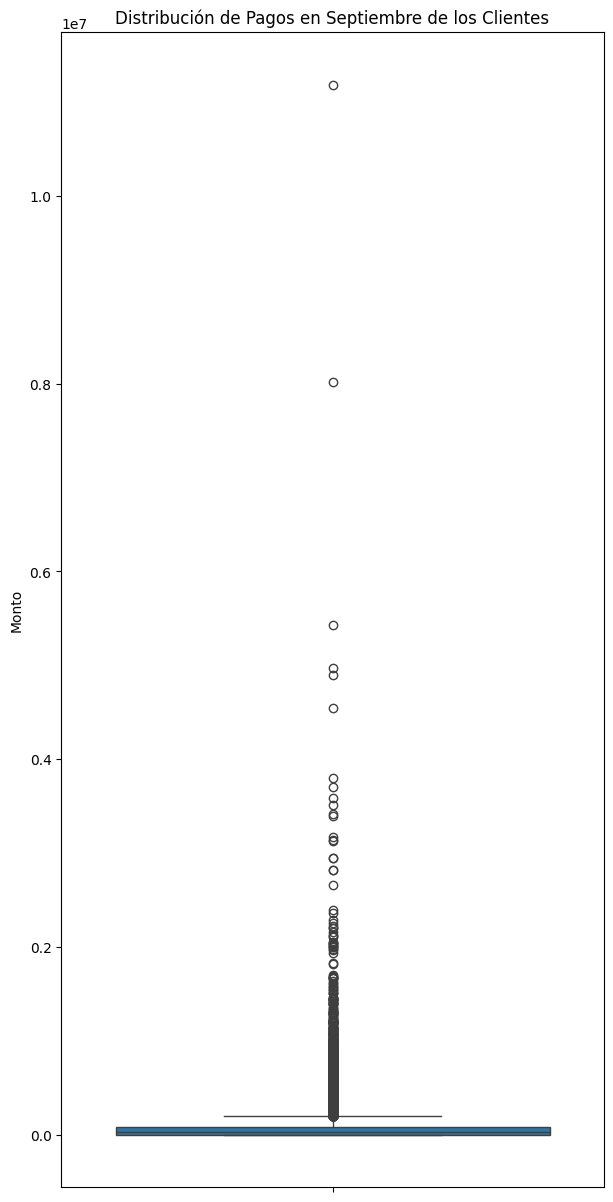

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T09'] )

plt.title('Distribución de Pagos en Septiembre de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Los cuantiles muestran que el primer cuartil (Q1) se encuentra en 0 pesos, lo que indica que una proporción importante de los clientes no realizó pagos o lo hizo con montos muy bajos. La mediana es de 26.986 pesos, mientras que el tercer cuartil (Q3) está en 80.000 pesos. El 95% de los pagos no superan los 255.441 pesos, y el valor máximo registrado es de 11.187.262 pesos, un pago extremadamente alto que eleva el rango total a 11.187.262 pesos. Este valor atípico tiene un impacto considerable en el promedio y amplía el rango total de los pagos.

**PagoNacT_T10**

En el mes de octubre, los pagos nacionales continúan mostrando una alta dispersión, aunque con un número significativo de valores faltantes. La media se sitúa en 66.187 pesos, lo que es ligeramente inferior a la del mes anterior. Sin embargo, la mediana es mucho más baja, alcanzando los 23.855 pesos, lo que indica que más de la mitad de los clientes realizó pagos significativamente inferiores a la media, sugiriendo una fuerte presencia de pagos bajos y pocos pagos altos que afectan las estadísticas.

El coeficiente de variación (CV) es de 2,30, lo que indica que la dispersión de los pagos es bastante alta, incluso mayor que en meses anteriores. La asimetría positiva es de 11,08, lo que refleja un sesgo hacia la derecha, con una distribución donde predominan los pagos bajos, pero algunos pagos extremadamente altos distorsionan las medidas generales de la variable.

La curtosis es de 222,18, lo que señala una distribución con colas largas y una mayor concentración de valores atípicos que afectan la forma de la distribución. Esta alta curtosis sigue siendo un patrón constante en los meses analizados, mostrando que una pequeña cantidad de pagos extremadamente altos está alterando las estadísticas.

En cuanto a los valores faltantes, se observan 5.191 valores nulos, lo que representa un 10,2% del total, un porcentaje considerablemente más alto que en meses anteriores. Este aumento en los valores faltantes es preocupante y debe ser analizado más a fondo, ya que puede influir en la calidad de las conclusiones derivadas de los datos.

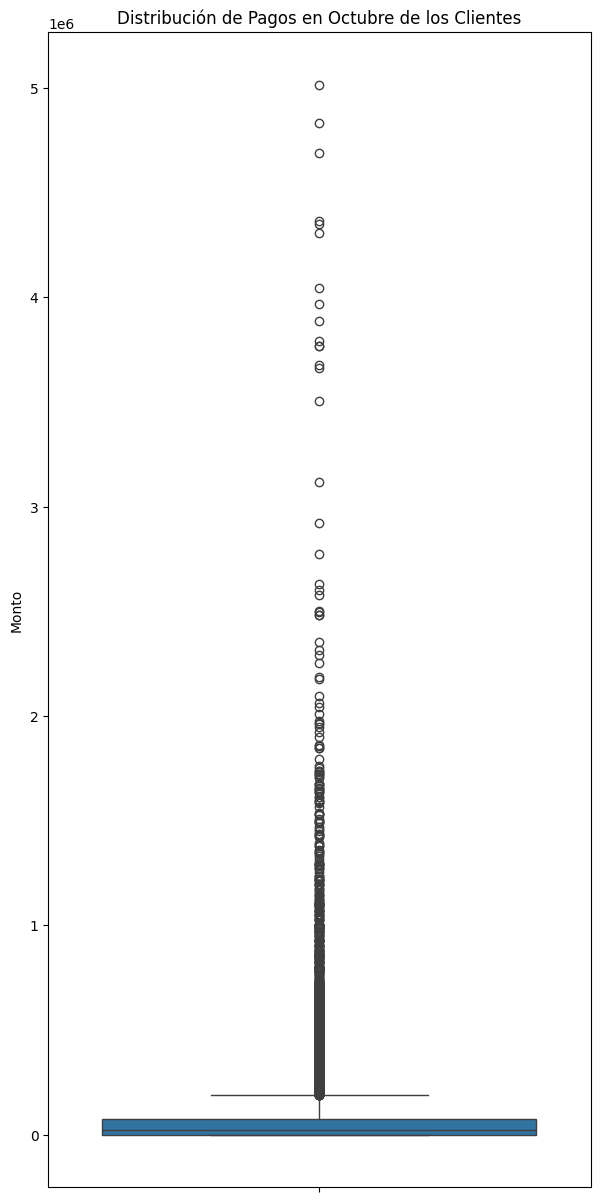

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T10'] )

plt.title('Distribución de Pagos en Octubre de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Los cuantiles muestran que el primer cuartil (Q1) se encuentra en 0 pesos, lo que sugiere que una parte significativa de los clientes no realizó pagos, o bien realizaron pagos muy bajos. La mediana se sitúa en 23.855 pesos, mientras que el tercer cuartil (Q3) se encuentra en 76.500 pesos. El 95% de los pagos no superan los 253.179 pesos, mientras que el valor máximo registrado es de 5.015.501 pesos, un pago excepcionalmente alto que eleva el rango total a 5.015.501 pesos. Este valor atípico sigue distorsionando el promedio, reflejando la elevada variabilidad en los pagos.

**PagoNacT_T11**

Durante noviembre, los pagos nacionales mantienen la tendencia de meses anteriores, caracterizándose por una distribución altamente asimétrica y una marcada presencia de valores extremos. La media asciende a 72.266 pesos, mientras que la mediana se sitúa en apenas 25.297 pesos. Esta diferencia significativa entre media y mediana sugiere, nuevamente, que una mayoría de los clientes realizó pagos considerablemente inferiores al promedio, con una minoría de pagos elevados que distorsionan la media.

El coeficiente de variación (CV) es de 2,37, uno de los más altos hasta la fecha, lo que confirma una elevada dispersión relativa en los datos. Esta variabilidad está fuertemente influenciada por valores atípicos extremos, como lo refleja también la alta asimetría positiva de 13,46. Este sesgo hacia la derecha indica que la mayoría de los pagos se concentran en valores bajos, pero con una cola larga que representa a clientes con pagos mucho mayores.

La curtosis alcanza un valor de 381,93, lo que evidencia colas largas y una fuerte concentración de valores extremos, en línea con lo observado en meses anteriores. Esta curtosis tan elevada sugiere que el comportamiento anómalo de unos pocos clientes sigue impactando de forma significativa en la forma de la distribución.

El 13% de los registros presenta valores faltantes (6.632 casos), lo que representa el porcentaje más alto observado hasta el momento. Esta proporción creciente de datos nulos podría tener implicancias en el análisis si no se aborda adecuadamente, por ejemplo mediante imputación o exclusión según el contexto del estudio.

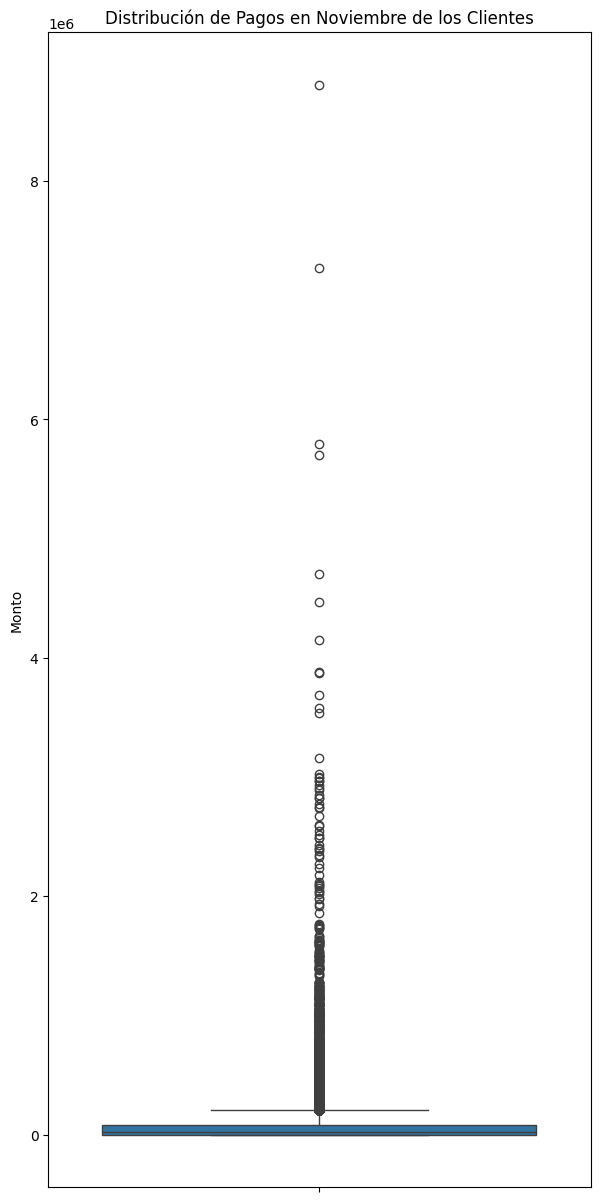

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T11'] )

plt.title('Distribución de Pagos en Noviembre de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

Los cuantiles refuerzan la concentración de pagos bajos: el primer cuartil se sitúa en 0 pesos, y la mediana apenas supera los 25.000. El 75% de los pagos no supera los 82.000 pesos, mientras que el 95% permanece por debajo de los 278.632. Sin embargo, el valor máximo registrado es de 8.807.955 pesos, estableciendo un rango extremo que vuelve a empujar hacia arriba los valores promedio.

**PagoNacT_T12**

En diciembre, los pagos nacionales alcanzan un nuevo nivel de variabilidad y presencia de valores extremos, marcando el mes con el comportamiento más disperso del año. La media se ubica en 72.570 pesos, un valor similar al de noviembre, pero la mediana es considerablemente inferior, situándose en apenas 26.275 pesos. Esta marcada diferencia entre media y mediana sigue reflejando una distribución fuertemente sesgada, donde la mayoría de los clientes realiza pagos bajos, mientras que un pequeño grupo realiza pagos excepcionalmente altos.

El coeficiente de variación (CV) alcanza 2,55, el más elevado del año, lo que confirma una dispersión extremadamente alta. La asimetría positiva también alcanza su punto máximo en diciembre, con un valor de 21,02, lo que evidencia una concentración aún mayor de pagos pequeños frente a unos pocos casos con montos desproporcionadamente altos.

La curtosis se dispara a 1.015,69, superando todos los registros anteriores. Esta cifra indica colas extraordinariamente largas y una elevada concentración de valores atípicos. El valor máximo registrado asciende a más de 13 millones de pesos, estableciendo un nuevo récord anual, que además amplía el rango total a esa cifra.

Los valores faltantes aumentan por tercer mes consecutivo: 8.251 registros nulos representan un 16,1% del total, lo que plantea una seria advertencia sobre la calidad y completitud de los datos en este periodo. Este nivel de datos faltantes podría afectar fuertemente los análisis si no se gestiona adecuadamente.

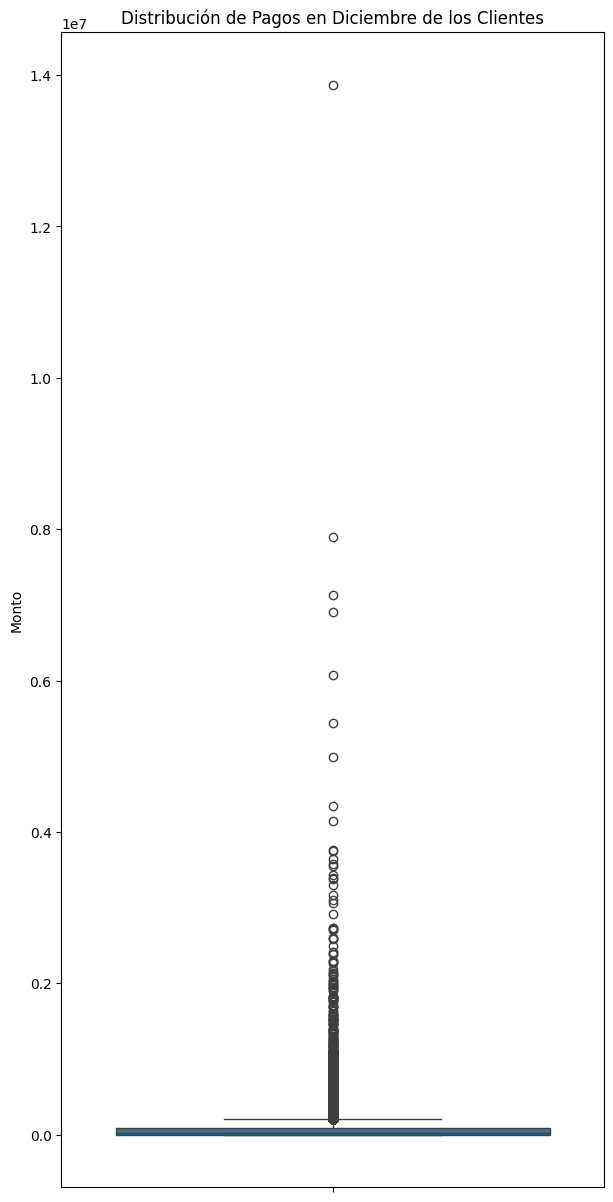

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
sns.boxplot(data['PagoNac_T12'] )

plt.title('Distribución de Pagos en Diciembre de los Clientes')
plt.ylabel('Monto')
plt.yticks()
plt.show()

En cuanto a los cuantiles, el primer cuartil (Q1) es nuevamente 0, indicando que una proporción relevante de clientes no realizó pagos. La mediana se mantiene bajo los 27.000 pesos, mientras que el tercer cuartil (Q3) no supera los 82.686 pesos. A pesar de que el 95% de los pagos permanece por debajo de los 270.609 pesos, el valor máximo de casi 14 millones marca una diferencia abismal, distorsionando fuertemente las medidas de tendencia central.

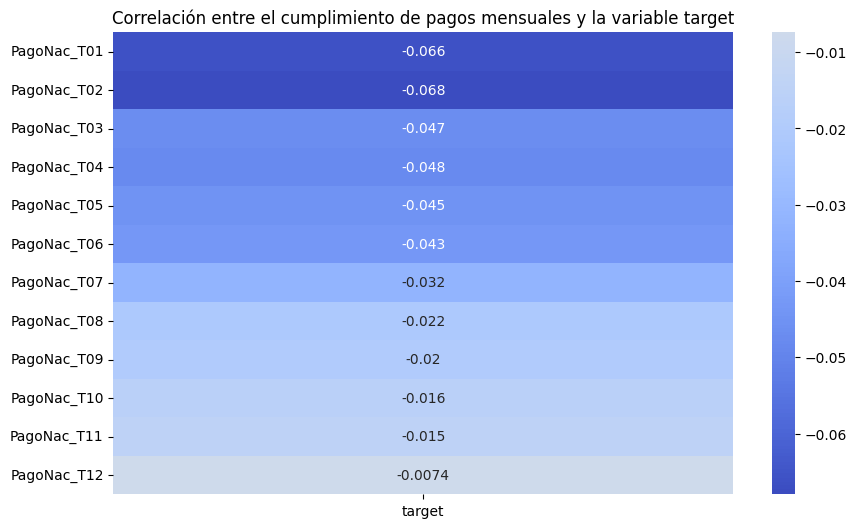

               target
PagoNac_T01 -0.066045
PagoNac_T02 -0.067958
PagoNac_T03 -0.047136
PagoNac_T04 -0.048128
PagoNac_T05 -0.044665
PagoNac_T06 -0.043073
PagoNac_T07 -0.031975
PagoNac_T08 -0.021522
PagoNac_T09 -0.019913
PagoNac_T10 -0.016240
PagoNac_T11 -0.014614
PagoNac_T12 -0.007393


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pagos_cols = [f'PagoNac_T{str(i).zfill(2)}' for i in range(1, 13)]
pagos_target = data[pagos_cols + ['target']]

correlaciones = pagos_target.corr()
correlacion_target = correlaciones[['target']].drop('target')

plt.figure(figsize=(10, 6))
sns.heatmap(correlacion_target, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre el cumplimiento de pagos mensuales y la variable target')
plt.show()

print(correlacion_target)


Al analizar la matriz de correlación entre los montos pagados a nivel nacional (PagoNac_T01 a PagoNac_T12) y la variable target —que indica si el cliente pagó o no la totalidad de su deuda— se observa una tendencia generalizada a una correlación negativa muy débil en todos los meses del año. Los coeficientes fluctúan entre -0.066 en enero y -0.007 en diciembre, con una magnitud que decrece progresivamente con el paso del tiempo.

Este patrón decreciente podría estar asociado a varios factores. En primer lugar, la presencia creciente de valores nulos en los últimos meses (alcanzando hasta un 16,1% en diciembre) puede estar debilitando la relación entre los pagos y el cumplimiento del pago total. Estos valores ausentes podrían representar tanto omisiones como falta de actividad financiera, y su tratamiento (imputación o exclusión) es fundamental antes de llegar a conclusiones definitivas.

Además, la distribución de los pagos presenta alta asimetría y curtosis en todos los periodos, lo que indica una fuerte presencia de outliers: un pequeño grupo de clientes con pagos extremadamente altos que distorsionan las estadísticas descriptivas y podrían también estar afectando la correlación. Si bien estos valores son reales, su impacto debe analizarse cuidadosamente, especialmente si corresponden a conductas atípicas o perfiles financieros fuera del rango del cliente promedio.

Dado este contexto, aún es prematuro descartar los pagos nacionales como variables relevantes. La baja correlación lineal observada no implica ausencia de relación; podría haber una conexión no lineal o mediada por otros factores (por ejemplo, ingreso, deuda previa o tipo de producto financiero). Es fundamental realizar una limpieza exhaustiva de los datos, tratando tanto los nulos como los valores extremos, para evaluar con mayor precisión su comportamiento y relevancia predictiva.

En resumen, aunque los pagos nacionales muestran una correlación débil con la variable objetivo en su estado actual, esto podría estar más relacionado con la calidad y estructura de los datos que con su verdadera capacidad explicativa. Se recomienda avanzar en la depuración y exploración más profunda antes de tomar decisiones sobre su inclusión o exclusión en etapas posteriores del modelo.

**Análisis Exploratorio rápido del Comportamiento de target**

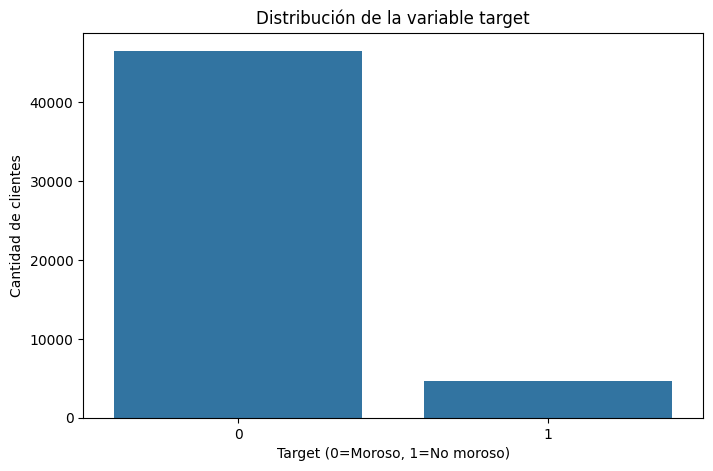

Distribución del target:
target
0    91.002269
1     8.997731
Name: proportion, dtype: float64


In [50]:
# Distribución de la variable target
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=data)
plt.title('Distribución de la variable target')
plt.xlabel('Target (0=Moroso, 1=No moroso)')
plt.ylabel('Cantidad de clientes')
plt.show()

# Porcentajes
target_dist = data['target'].value_counts(normalize=True) * 100
print(f"Distribución del target:\n{target_dist}")

La distribución de la variable target (91% morosos vs 9% cumplidores) resulta consistente con los patrones atípicos observados en el análisis exploratorio: las variables de facturación y pagos mostraron una elevada dispersión con asimetría positiva, donde una minoría de clientes concentraba los montos más altos, mientras que la mayoría presentaba valores bajos o nulos. Esta estructura sugiere que, efectivamente, la mayoría de los clientes en la muestra tienen un comportamiento financiero limitado (baja facturación y pagos mínimos), lo que se traduce en la alta tasa de morosidad observada. El reducido grupo de cumplidores (9%) probablemente corresponde a aquellos clientes con patrones transaccionales más robustos y consistentes, identificados previamente como outliers en los análisis univariados. Esta coherencia entre variables predictoras y target valida la calidad del etiquetado y enfatiza la necesidad de abordar este escenario extremo con técnicas especializadas de modelado.

La aparente baja correlación lineal entre las variables que consideramos predictoras y el target (morosidad) se explica coherentemente con los patrones identificados en el análisis exploratorio:

1. Estructura asimétrica de los datos: La mayoría de los clientes (91% morosos) probablemente se concentra en valores bajos de facturación/pagos, mientras que el 9% restante (cumplidores) actúa como outliers con comportamientos dispares.

2. No linealidad inherente: Las relaciones entre variables y morosidad no siguen patrones lineales simples. Por ejemplo, clientes con facturación muy alta (outliers) podrían ser cumplidores, mientras que aquellos con facturación moderada pero irregular podrían ser morosos, un patrón que la correlación de Pearson no captura.

3. Ruido en la clase mayoritaria: La abrumadora proporción de morosos introduce ruido estadístico, donde pequeñas variaciones transaccionales dentro de esta clase enmascaran señales relevantes.

#FASE 3 PREPARACIÓN DE LOS DATOS


## Imputación de PagoNac_T99

La mediana por fila es el método más adecuado porque:

Mantiene la integridad de los patrones de comportamiento de los clientes.

Es robusta ante outliers y evita distorsionar el análisis por consumos extremos.

Garantiza una imputación coherente con el comportamiento histórico de cada cliente.

Este enfoque asegura que los resultados del análisis posterior sean fiables y realistas, lo cual es clave para cualquier estrategia basada en el perfil del cliente.

In [51]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1) Clonar
df_raw = data.copy()
df = df_raw.copy()

# 2) Definir columnas
cols_pago = [f'PagoNac_T{str(i).zfill(2)}' for i in range(1, 13)]

# 3) Pipeline de imputación (mediana por columna)
pipeline_pago = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])
df[cols_pago] = pipeline_pago.fit_transform(df[cols_pago])

# 4) Guardar resultados
df.to_parquet('clientes_imputados.parquet', index=False)


In [52]:
# Comprobar cuántos nulos quedan después de la imputación
df[cols_pago].isnull().sum()


PagoNac_T01    0
PagoNac_T02    0
PagoNac_T03    0
PagoNac_T04    0
PagoNac_T05    0
PagoNac_T06    0
PagoNac_T07    0
PagoNac_T08    0
PagoNac_T09    0
PagoNac_T10    0
PagoNac_T11    0
PagoNac_T12    0
dtype: int64

In [53]:
df_imputado = pd.read_parquet('clientes_imputados.parquet')
df_imputado[cols_pago].head()


PagoNac_T01  PagoNac_T02  PagoNac_T03  PagoNac_T04  PagoNac_T05  \
0      33000.0      33000.0      41000.0      39000.0      50000.0   
1     300000.0      14000.0          0.0     200000.0     200000.0   
2     216676.0      25189.0          0.0      54138.0      69822.0   
3      60000.0      60000.0      60000.0      60000.0      50000.0   
4     272925.0     143686.0     220811.0     246171.0     301860.0   

   PagoNac_T06  PagoNac_T07  PagoNac_T08  PagoNac_T09  PagoNac_T10  \
0      36000.0      26000.0      25000.0      24000.0      23000.0   
1     100000.0     200000.0     180000.0     221000.0     194000.0   
2     124289.0      60886.0          0.0      45890.0      14850.0   
3      60000.0      45000.0      60000.0      60000.0      40000.0   
4     386774.0     431776.0     435450.0     272969.0     301404.0   

   PagoNac_T11  PagoNac_T12  
0          0.0      22000.0  
1     150000.0     250000.0  
2     178179.0      29990.0  
3      50000.0      80000.0  
4     245513.0     236467.0

## Imputacion de Fac_T99


**Imputación de Fac_T01 - Fac_T12**

Variables: Montos facturados por cliente en tarjeta de crédito, meses 1-12

Significado de nulos: Ausencia de registro de facturación para ese mes

Objetivo: Rellenar faltantes manteniendo patrones individuales

Método: Usar la mediana de la facturación mensual de cada cliente (meses 1-12)

La imputación con mediana por columna fue seleccionada porque:

Es robusta a outliers (importante dado los valores extremos observados)

Mantiene la distribución original de los datos mejor que la media

Es coherente con el tratamiento dado a las variables de pago

Preserva la estructura temporal de los datos

In [54]:
# 1) Definir columnas de facturación
cols_fact = [f'Fac_T{str(i).zfill(2)}' for i in range(1, 13)]

# 2) Pipeline de imputación (mediana por columna)
pipeline_fact = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

# 3) Aplicar imputación
df[cols_fact] = pipeline_fact.fit_transform(df[cols_fact])

# 4) Reemplazar valores negativos por cero
df[cols_fact] = df[cols_fact].applymap(lambda x: max(x, 0))

# 5) Verificar nulos después de imputación
print("Valores nulos después de imputación en facturación:")
print(df[cols_fact].isnull().sum())

# 6) Mostrar estadísticas descriptivas post-imputación y limpieza
print("\nEstadísticas descriptivas después de imputación y limpieza:")
print(df[cols_fact].describe())


<ipython-input-54-d49fd2b52e63>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols_fact] = df[cols_fact].applymap(lambda x: max(x, 0))


Valores nulos después de imputación en facturación:
Fac_T01    0
Fac_T02    0
Fac_T03    0
Fac_T04    0
Fac_T05    0
Fac_T06    0
Fac_T07    0
Fac_T08    0
Fac_T09    0
Fac_T10    0
Fac_T11    0
Fac_T12    0
dtype: int64

Estadísticas descriptivas después de imputación y limpieza:
            Fac_T01       Fac_T02       Fac_T03       Fac_T04       Fac_T05  \
count  5.112400e+04  5.112400e+04  5.112400e+04  5.112400e+04  5.112400e+04   
mean   7.098299e+04  7.838882e+04  7.312334e+04  7.747558e+04  6.743355e+04   
std    1.345511e+05  1.423934e+05  1.335710e+05  1.355503e+05  1.209896e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.615000e+04  3.202600e+04  3.158450e+04  3.299000e+04  2.600000e+04   
75%    8.780000e+04  9.868475e+04  9.180000e+04  9.827150e+04  8.491000e+04   
max    4.166432e+06  5.918421e+06  9.340500e+06  4.219445e+06  3.013030e+06   

      

**Justificación de la imputación y limpieza de datos**

- **Imputación con mediana**: Se eligió la mediana como estrategia de imputación porque es robusta ante valores extremos o atípicos. Esto es especialmente útil en variables financieras como la facturación mensual, donde puede haber outliers debido a gastos inusuales.

- **Reemplazo de valores negativos por cero**: En el contexto de facturación, los valores negativos no tienen un significado válido (no se puede "facturar en negativo"). Por tanto, se considera más adecuado reemplazarlos por cero para evitar distorsiones en el análisis posterior.

Estas transformaciones buscan mejorar la calidad de los datos y asegurar su coherencia semántica antes de aplicar modelos predictivos.

**Transformación logarítmica (log1p) de facturación y pagos**

Para atenuar la alta asimetría y comprimir las colas largas, aplicamos `log1p` sobre las columnas de facturación (`Fac_T01–T12`) y pagos (`PagoNac_T01–T12`). Esto convierte ceros en 0 y lleva valores muy altos a una escala más manejable, facilitando las etapas de escalado posteriores.

**Escalado robusto (RobustScaler) en facturación y pagos**

Utilizamos `RobustScaler` (que centra en la mediana y escala por IQR) para normalizar sin que los outliers distorsionen la escala. Así llevamos cada variable a una escala comparable, manteniendo la robustez frente a valores extremos.




In [56]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer, RobustScaler, StandardScaler


# Clonar DataFrame imputado
df = df_imputado.copy()

# Definir columnas
fac_cols = [f'Fac_T{str(i).zfill(2)}' for i in range(1, 13)]
pagos_cols = [f'PagoNac_T{str(i).zfill(2)}' for i in range(1, 13)]

# 2) Log-transform
log1p = FunctionTransformer(np.log1p, validate=False)
df[fac_cols + pagos_cols] = log1p.transform(df[fac_cols + pagos_cols])
print("=== Tras log1p ===")
display(df[fac_cols + pagos_cols].describe())

# 3) RobustScaler
robust = RobustScaler()
df[fac_cols + pagos_cols] = robust.fit_transform(df[fac_cols + pagos_cols])
print("\n=== Tras RobustScaler ===")
display(df[fac_cols + pagos_cols].describe())

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


=== Tras log1p ===


Fac_T01       Fac_T02       Fac_T03       Fac_T04       Fac_T05  \
count  51117.000000  51102.000000  48799.000000  51098.000000  51080.000000   
mean       7.227376      7.626459      7.538107      7.654392      7.318603   
std        5.272996      5.170882      5.198329      5.160327      5.205397   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       10.172369     10.376082     10.360628     10.403990     10.165890   
75%       11.383067     11.500567     11.478355     11.496082     11.350280   
max       15.242571     15.593580     16.049870     15.255214     14.918457   

            Fac_T06       Fac_T07       Fac_T08       Fac_T09       Fac_T10  \
count  48796.000000  50283.000000  48903.000000  47319.000000  44138.000000   
mean       7.320677      7.791285      7.320151      7.389584      6.923790   
std        5.223156      5.110604      5.212670      5.206849      5.293403   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       10.198431     10.486150     10.197686     10.252030      9.982414   
75%       11.371558     11.521216     11.346599     11.378765     11.219259   
max       15.170031     15.012055     15.094083     15.216139     14.866922   

       ...   PagoNac_T03   PagoNac_T04   PagoNac_T05   PagoNac_T06  \
count  ...  51124.000000  51124.000000  51124.000000  51124.000000   
mean   ...      8.222610      8.729624      7.894276      8.081804   
std    ...      4.652491      4.346787      4.842186      4.792275   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      8.515942      8.699681      0.000000      2.876082   
50%    ...     10.308986     10.463132     10.239996     10.308986   
75%    ...     11.318749     11.441596     11.289794     11.381945   
max    ...     16.137898     15.666072     15.366679     15.695206   

        PagoNac_T07   PagoNac_T08   PagoNac_T09   PagoNac_T10   PagoNac_T11  \
count  51124.000000  51124.000000  51124.000000  51124.000000  51124.000000   
mean       7.743457      7.898419      8.007421      7.671799      7.934298   
std        4.914729      4.799426      4.735731      4.886578      4.767314   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      3.682550      0.000000      0.000000   
50%       10.163888     10.165890     10.203111     10.079791     10.138461   
75%       11.266680     11.219095     11.186277     11.110906     11.139104   
max       15.930413     15.959141     16.230286     15.428044     15.991166   

        PagoNac_T12  
count  51124.000000  
mean       8.087306  
std        4.661456  
min        0.000000  
25%        8.006701  
50%       10.176411  
75%       11.106118  
max       16.445476  

[8 rows x 24 columns]


=== Tras RobustScaler ===


Fac_T01       Fac_T02       Fac_T03       Fac_T04       Fac_T05  \
count  51117.000000  5.110200e+04  48799.000000  51098.000000  51080.000000   
mean      -0.258717 -2.390858e-01     -0.245899     -0.239177     -0.250856   
std        0.463232  4.496197e-01      0.452881      0.448877      0.458614   
min       -0.893640 -9.022235e-01     -0.902623     -0.905003     -0.895651   
25%       -0.893640 -9.022235e-01     -0.902623     -0.905003     -0.895651   
50%        0.000000  7.722908e-17      0.000000      0.000000      0.000000   
75%        0.106360  9.777651e-02      0.097377      0.094997      0.104349   
max        0.445416  4.536732e-01      0.495650      0.421989      0.418718   

            Fac_T06       Fac_T07       Fac_T08       Fac_T09       Fac_T10  \
count  48796.000000  50283.000000  48903.000000  47319.000000  4.413800e+04   
mean      -0.253066     -0.233905     -0.253603     -0.251560 -2.726226e-01   
std        0.459318      0.443582      0.459404      0.457593  4.718139e-01   
min       -0.896837     -0.910160     -0.898744     -0.900979 -8.897570e-01   
25%       -0.896837     -0.910160     -0.898744     -0.900979 -8.897570e-01   
50%        0.000000      0.000000      0.000000      0.000000  7.916539e-17   
75%        0.103163      0.089840      0.101256      0.099021  1.102430e-01   
max        0.437196      0.392832      0.431530      0.436261  4.353681e-01   

       ...   PagoNac_T03   PagoNac_T04   PagoNac_T05   PagoNac_T06  \
count  ...  51124.000000  51124.000000  51124.000000  51124.000000   
mean   ...     -0.744388     -0.632225     -0.207773     -0.261841   
std    ...      1.659940      1.585311      0.428899      0.563408   
min    ...     -3.678094     -3.815995     -0.907013     -1.211986   
25%    ...     -0.639731     -0.643146     -0.907013     -0.873857   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.360269      0.356854      0.092987      0.126143   
max    ...      2.079670      1.897557      0.454099      0.633236   

        PagoNac_T07   PagoNac_T08   PagoNac_T09   PagoNac_T10   PagoNac_T11  \
count  51124.000000  51124.000000  51124.000000  51124.000000  51124.000000   
mean      -0.214831     -0.202108     -0.292613     -0.216723     -0.197876   
std        0.436218      0.427791      0.631117      0.439800      0.427980   
min       -0.902119     -0.906124     -1.359739     -0.907198     -0.910168   
25%       -0.902119     -0.906124     -0.868976     -0.907198     -0.910168   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.097881      0.093876      0.131024      0.092802      0.089832   
max        0.511821      0.516374      0.803224      0.481352      0.525420   

        PagoNac_T12  
count  51124.000000  
mean      -0.674032  
std        1.503978  
min       -3.283330  
25%       -0.700038  
50%        0.000000  
75%        0.299962  
max        2.022659  

[8 rows x 24 columns]

**Transformaciones aplicadas y resultados**

Dado que las variables de facturación y pagos mensuales presentan distribuciones fuertemente sesgadas a la derecha, con ceros y outliers, se aplicó una transformación logarítmica `log1p` para suavizar esas colas largas y mantener los ceros.

Luego, se utilizó `RobustScaler`, que escala los datos según el rango intercuartílico (IQR) y centra en la mediana, lo que permite reducir el impacto de los valores atípicos que aún persisten después del `log1p`.

**Validación de resultados**
- La mediana de todas las columnas escaladas es **0**, y el IQR (25% a 75%) se ubica en un rango reducido (≈ –0.9 a 0.1), lo que estandariza efectivamente la escala entre variables.
- Los valores extremos siguen presentes pero **no afectan la escala de los datos centrales**, permitiendo que los modelos los traten adecuadamente si son relevantes.
